## Dependencies versions

In [4]:
!pip install scikit-learn==1.3.2 --user
!pip install pandas==1.4.3 --user
!pip install numpy==1.26.4 --user
!pip install xgboost==1.5.0 --user

  Using cached pandas-1.4.3-cp310-cp310-win_amd64.whl.metadata (12 kB)
Using cached pandas-1.4.3-cp310-cp310-win_amd64.whl (10.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.3.0 requires pandas>=1.4.4, but you have pandas 1.4.3 which is incompatible.
pdpbox 0.3.0 requires xgboost>=1.7.1, but you have xgboost 1.5.0 which is incompatible.
pycaret 3.3.2 requires importlib-metadata>=4.12.0, but you have importlib-metadata 4.11.3 which is incompatible.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.3.2 which is incompatible.


## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [6]:
df = pd.read_csv('laptop_data.csv')

## Initial Exploration

In [7]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


**Target Feature = price --> Numerical (continuous) ---> therefore, Regression Problem**

In [8]:
## Shape of the dataset

In [9]:
df.shape

(1303, 12)

**Dataset has 11 input features, 1 target feature (price) i.e. a total of 12 features and 1303 observations**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


- **Unnamed: 0 Feature is nothing but serial no. so we can remove it from our analysis here since it will have 0 contribution in the analysis**
    
- **out of 11 input features only one feature (except Unnamed: 0) is numerical (Inches) and rest all the others are categorical.**

In [11]:
df.duplicated().sum() # 0 duplicates but will check after removing the serial number

0

In [12]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**The data has no missing values**

In [13]:
#removing unnecessary column "Unnamed: 0"
df.drop(columns=['Unnamed: 0'],inplace=True)

In [14]:
df.duplicated().sum()

29

**There are 29 duplicates in total - we'll keep it as it is, as of now - No removal of duplicates**

In [15]:
df[df.duplicated()] #ye observations mai ek se zyada observation alag alag serial number pe repeat ho rhi h (saare features)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


## Exploratory Data Analysis and Data Cleaning

### Ram

In [16]:
print(df['Ram'].value_counts())
print("-"*30)
print("Total no. of categories in Ram:",len(df['Ram'].value_counts()))

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64
------------------------------
Total no. of categories in Ram: 9


<Axes: >

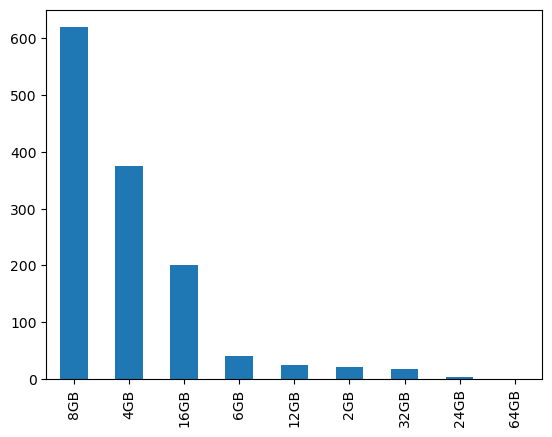

In [17]:
#Barplot for value counts
df['Ram'].value_counts().plot(kind='bar')

In [18]:
#Ram = Replacing GB with blanks and replacing GB to blanks 
df['Ram'] = df['Ram'].str.replace('GB','')
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


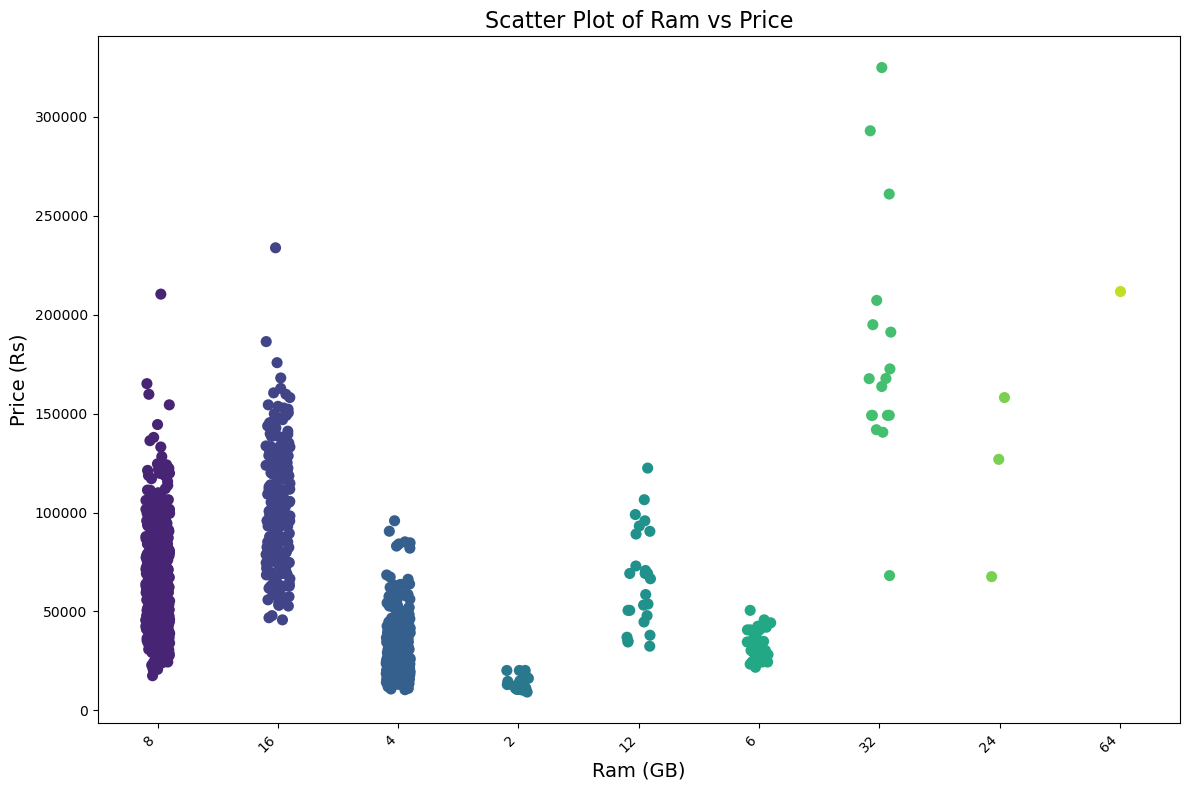

In [19]:
## Strip plot for Ram vs Prive
plt.figure(figsize=(12, 8))
sns.stripplot(x='Ram', y='Price', data=df, jitter=0.1, palette='viridis', size=8)
plt.xlabel('Ram (GB)', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Scatter Plot of Ram vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


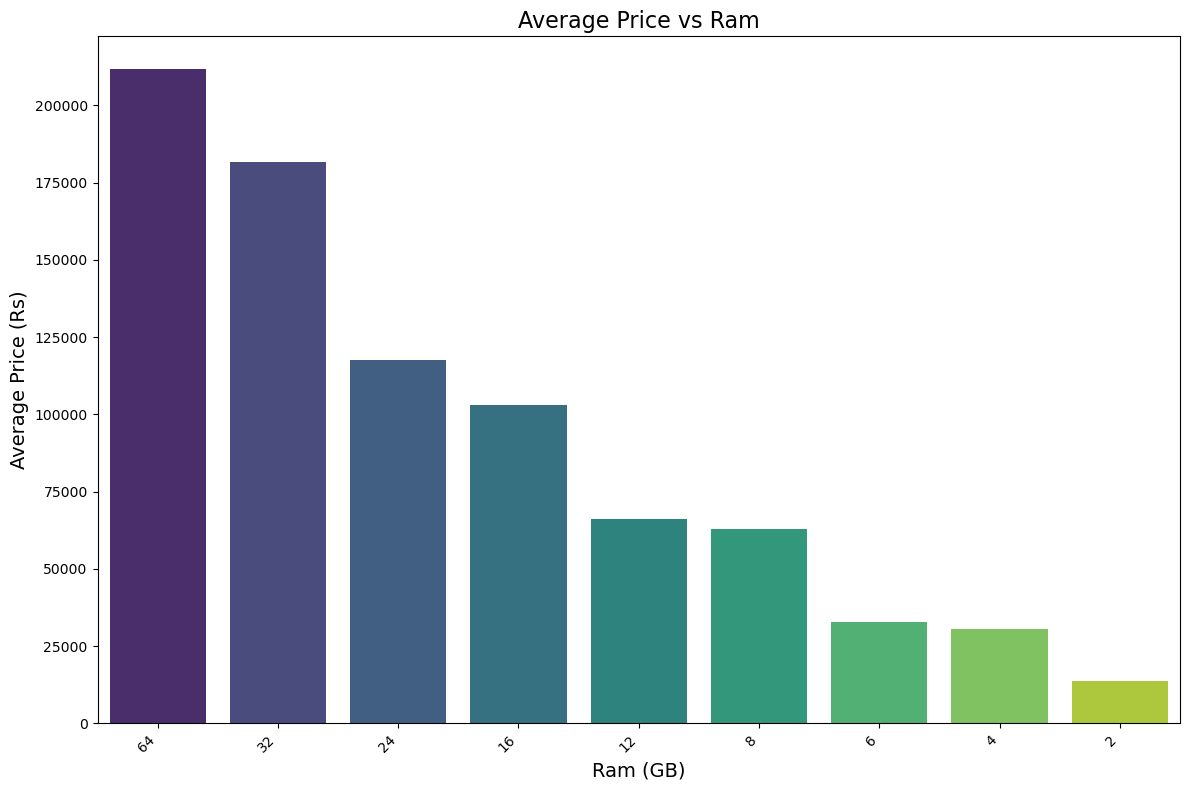

In [20]:
# Calculate mean prices for each RAM category
mean_prices = df.groupby('Ram')['Price'].mean().reset_index()

# Sort the mean prices in descending order
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8)) 
sns.barplot(x='Ram', y='Price', data=mean_prices, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Ram (GB)', fontsize=14)
plt.ylabel('Average Price (Rs)', fontsize=14)
plt.title('Average Price vs Ram', fontsize=16)
plt.tight_layout()  

# Display the plot
plt.show()


- **As Ram size increases, the price of the laptop also increases.**

- **The price of a few laptops which have 32 gb ram is even higher than the laptop with 64 gb ram**


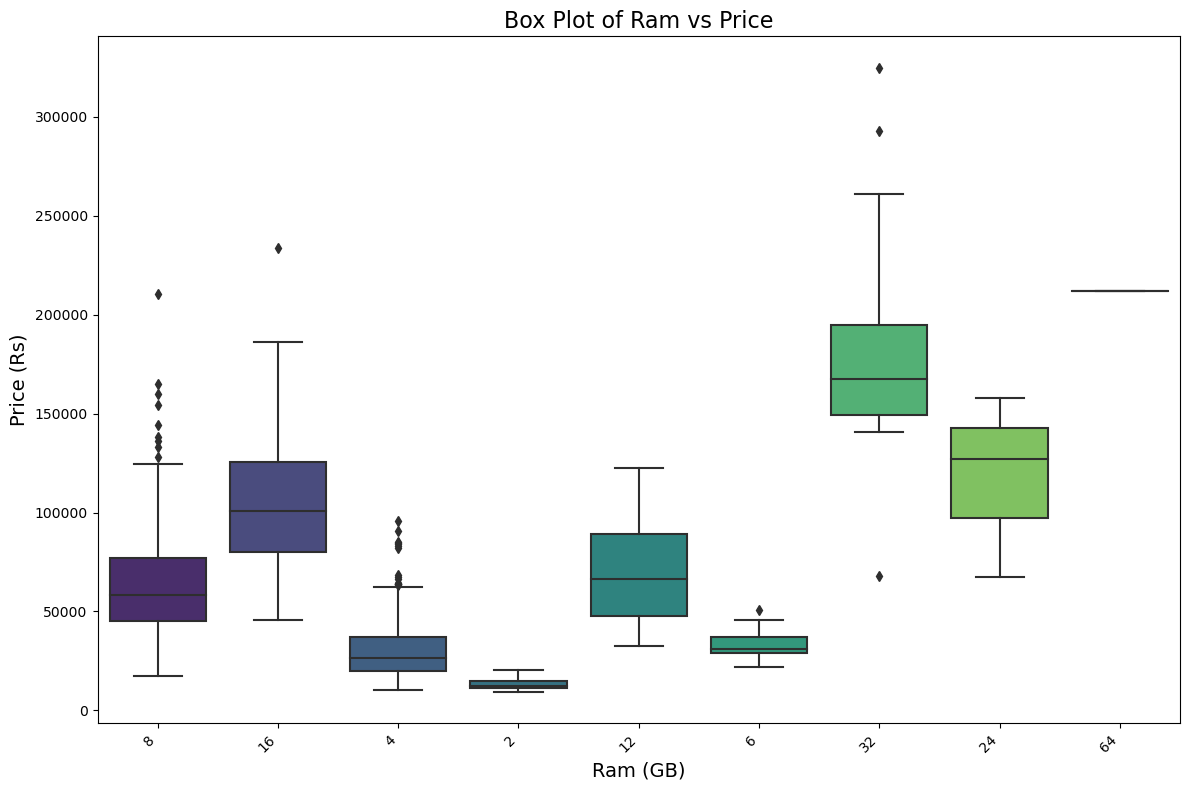

In [21]:
## Boxplot for Ram vs Price
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ram', y='Price', data=df, palette='viridis')
plt.xlabel('Ram (GB)', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Box Plot of Ram vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**There are a few outliers in RAM vs Price box plot but these all are valid values so no treatment**

In [22]:
sorted_df = df.sort_values(by='Price', ascending=False)
sorted_df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,324954.720
830,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,292986.720
610,Lenovo,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,261018.720
749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3kg,233845.920
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,211788.000
...,...,...,...,...,...,...,...,...,...,...,...
290,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2,16GB SSD,Intel HD Graphics,Chrome OS,2.19kg,10602.720
31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65kg,10602.720
1120,Vero,Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35kg,10442.880
20,Asus,Netbook,11.6,1366x768,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,10224.432


In [23]:
#converting Ram to integer type
df["Ram"] = df["Ram"].astype('int64')

**RAM is sorted now**

### Weight

In [24]:
## Removing kg from the weight feature 
df['Weight'] = df['Weight'].str.replace('kg','')
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [25]:
len(df['Weight'].value_counts())

179

In [26]:
#converting weight to float
df['Weight']=df['Weight'].astype('float64')

<Axes: xlabel='Weight', ylabel='Count'>

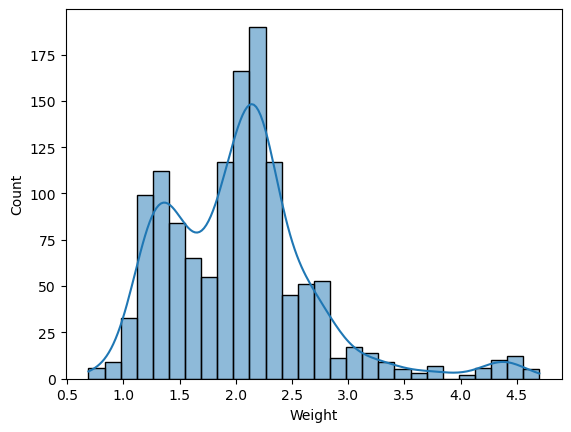

In [27]:
# histogram of weight
sns.histplot(df["Weight"],kde=True)

**Most of the laptops have weight between 1 - 2.7 kgs**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


In [29]:
df['Weight'].max()

4.7

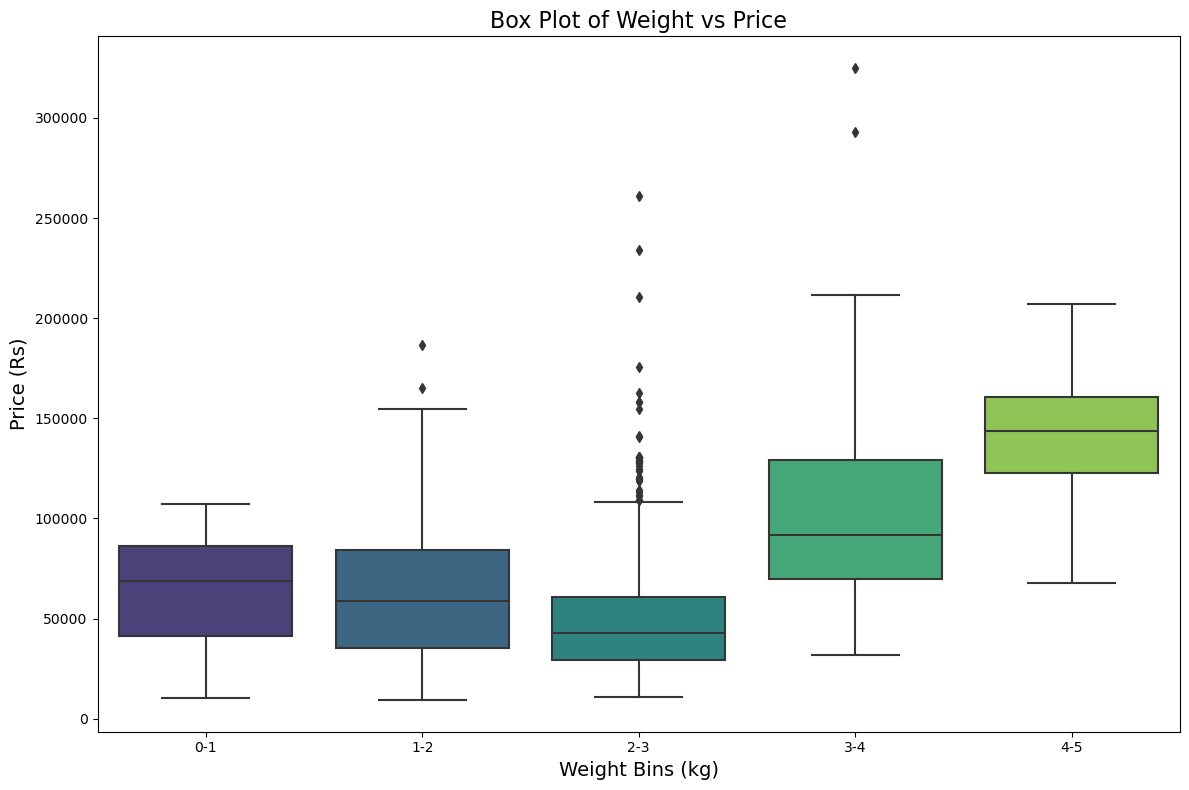

In [30]:
#Weight vs Price

# Bin the Weight into categories
bins = [0, 1, 2, 3, 4, 5]  # Adjust bin edges as necessary
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Weight_Binned'] = pd.cut(df['Weight'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Weight_Binned', y='Price', data=df, palette='viridis')
plt.xlabel('Weight Bins (kg)', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Box Plot of Weight vs Price', fontsize=16)
plt.tight_layout()
plt.show()


**Not neccessarily the weight of the laptops have a huge impact on price. An increasing relation with price can only be seen in the heavy laptops(3-5kg)**

**Weight is sorted**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1303 non-null   object  
 1   TypeName          1303 non-null   object  
 2   Inches            1303 non-null   float64 
 3   ScreenResolution  1303 non-null   object  
 4   Cpu               1303 non-null   object  
 5   Ram               1303 non-null   int64   
 6   Memory            1303 non-null   object  
 7   Gpu               1303 non-null   object  
 8   OpSys             1303 non-null   object  
 9   Weight            1303 non-null   float64 
 10  Price             1303 non-null   float64 
 11  Weight_Binned     1303 non-null   category
dtypes: category(1), float64(3), int64(1), object(7)
memory usage: 113.6+ KB


### Price - Target Feature

<Axes: xlabel='Price', ylabel='Count'>

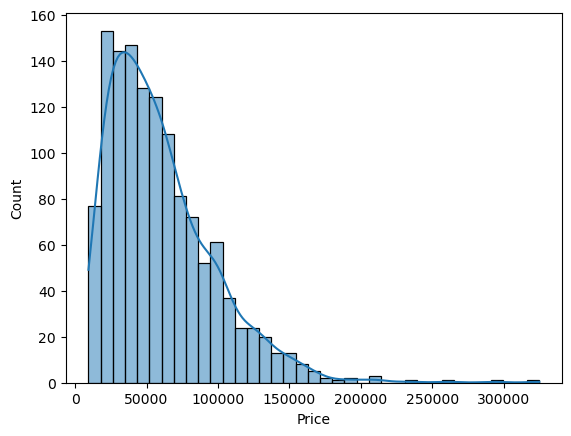

In [32]:
sns.histplot(df['Price'], kde=True)

- **Target feature is slighly right skewed as it should be because most of the commodities are budget friendly and not really costly since most of the people belong to middle class in any part of the world and they buy budget friendly items (mostly)**
- **It is fair to have a right skewed distribution**
- **One change the one can do is to convert the price feature into an integer type since paise in such big amount's (price) does not make any sense/impact** - But leaving it as it as.

In [33]:
print(df['Price'].mean())
print(df['Price'].median())

59870.042910207136
52054.56


- **Mean price of the laptops = 60k**
- **Median price of the laptops = 52k**

### Company/Brand Name

<Axes: >

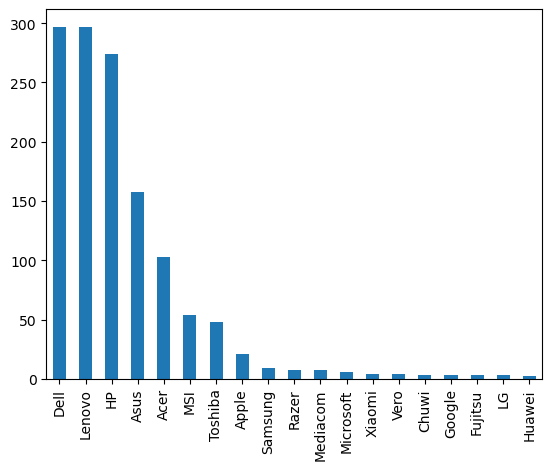

In [34]:
#company wise laptop counts and their plot
df['Company'].value_counts().plot(kind='bar')

- **Most of the laptops are from the companies that are really popular but there are some laptops that belongs to the companies that are not popular in the laptop market space**
- One suggestion could be the reduction of categories by merging the unpopular categories in one new category. 
- As of now we will take everything as it is

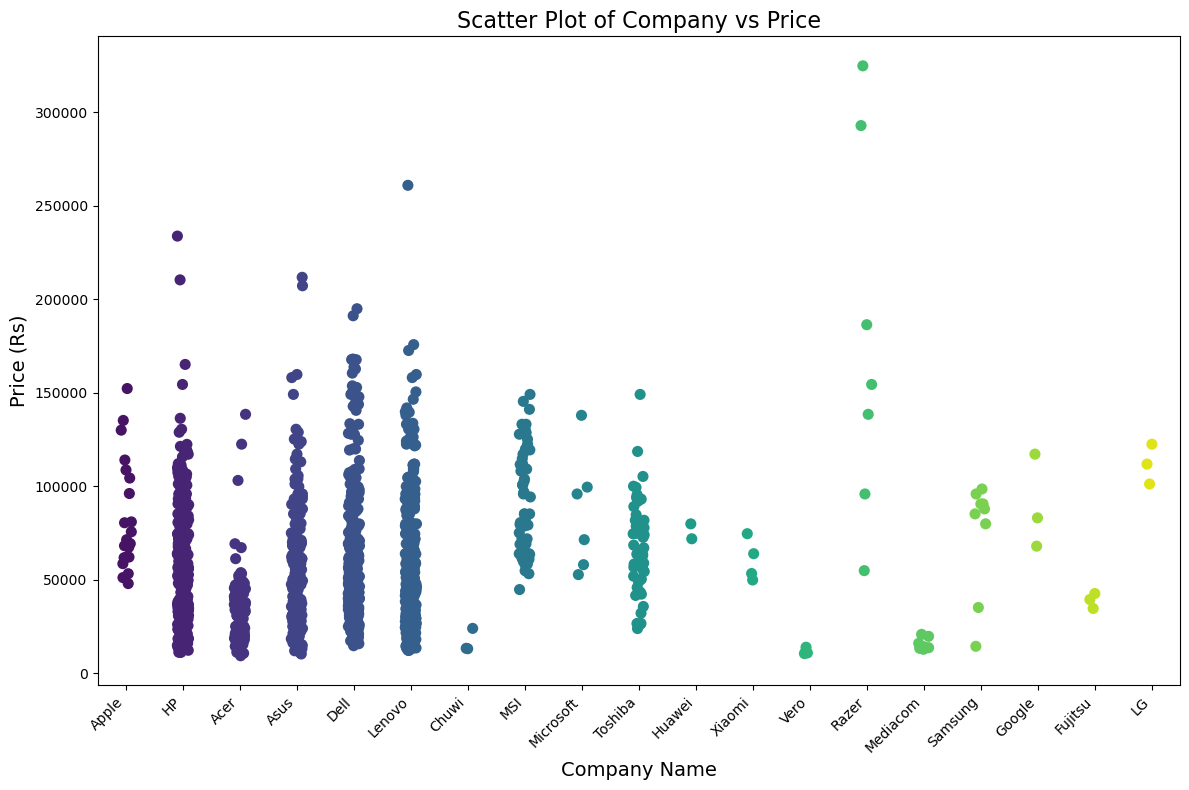

In [35]:
## Strip plot for Company vs Price
plt.figure(figsize=(12, 8))
sns.stripplot(x='Company', y='Price', data=df, jitter=0.1, palette='viridis', size=8)
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Scatter Plot of Company vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**The price of laptops certainly depends on the brand. However, within certain brands, there is a wide range of prices, with some laptops being very expensive and others being quite affordable.**


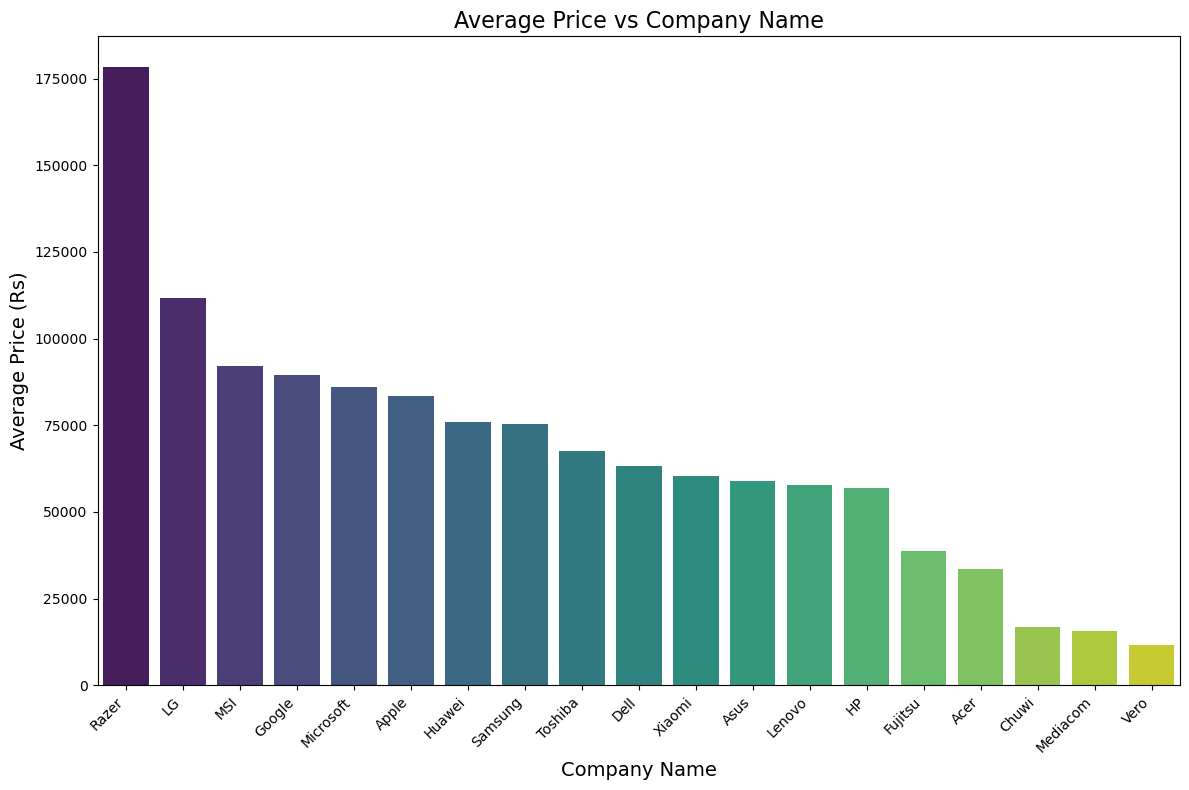

In [36]:
# Calculate mean prices for each RAM category
mean_prices = df.groupby('Company')['Price'].mean().reset_index()

# Sort the mean prices in descending order
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8)) 
sns.barplot(x='Company', y='Price', data=mean_prices, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Average Price (Rs)', fontsize=14)
plt.title('Average Price vs Company Name', fontsize=16)
plt.tight_layout()  

# Display the plot
plt.show()


**Barplots of mean's could also be misleading in some scenarios as the count of each category also plays a crucial role in the calculation**
- Razer has the highest mean price.
- Most of the companies have mean price between 50K-100K

### Typename

<Axes: >

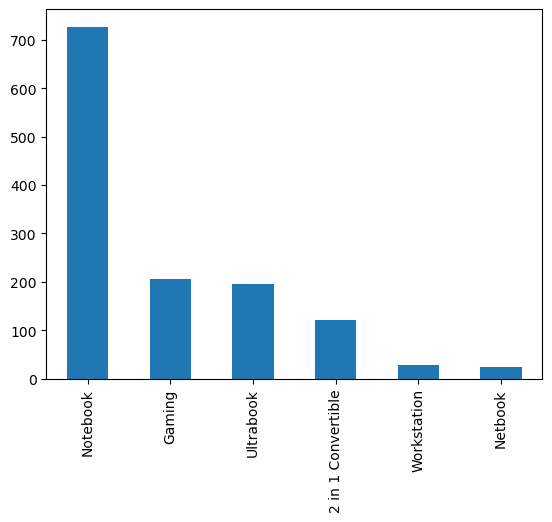

In [37]:
# type of laptops
df['TypeName'].value_counts().plot(kind='bar')

**Notebook laptops are most popular among the laptop market followed by Gaming and Ultrabook laptops**

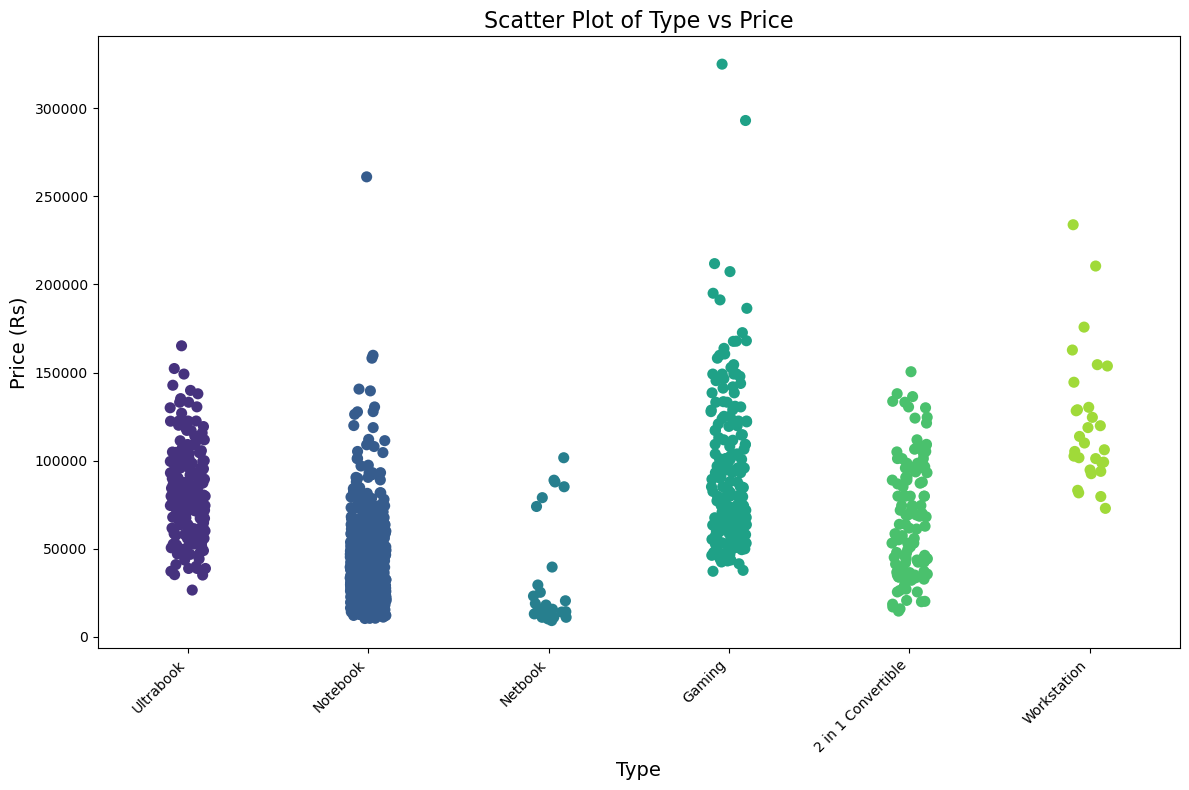

In [38]:
## Strip plot for TypeName vs Price
plt.figure(figsize=(12, 8))
sns.stripplot(x='TypeName', y='Price', data=df, jitter=0.1, palette='viridis', size=8)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Scatter Plot of Type vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- **Notebook laptops, 2 in 1 convertible (laptop + Tablets) and Netbook laptops are mostly economical**
- **Gaming and Workstation laptops are generally costlier than the rest**

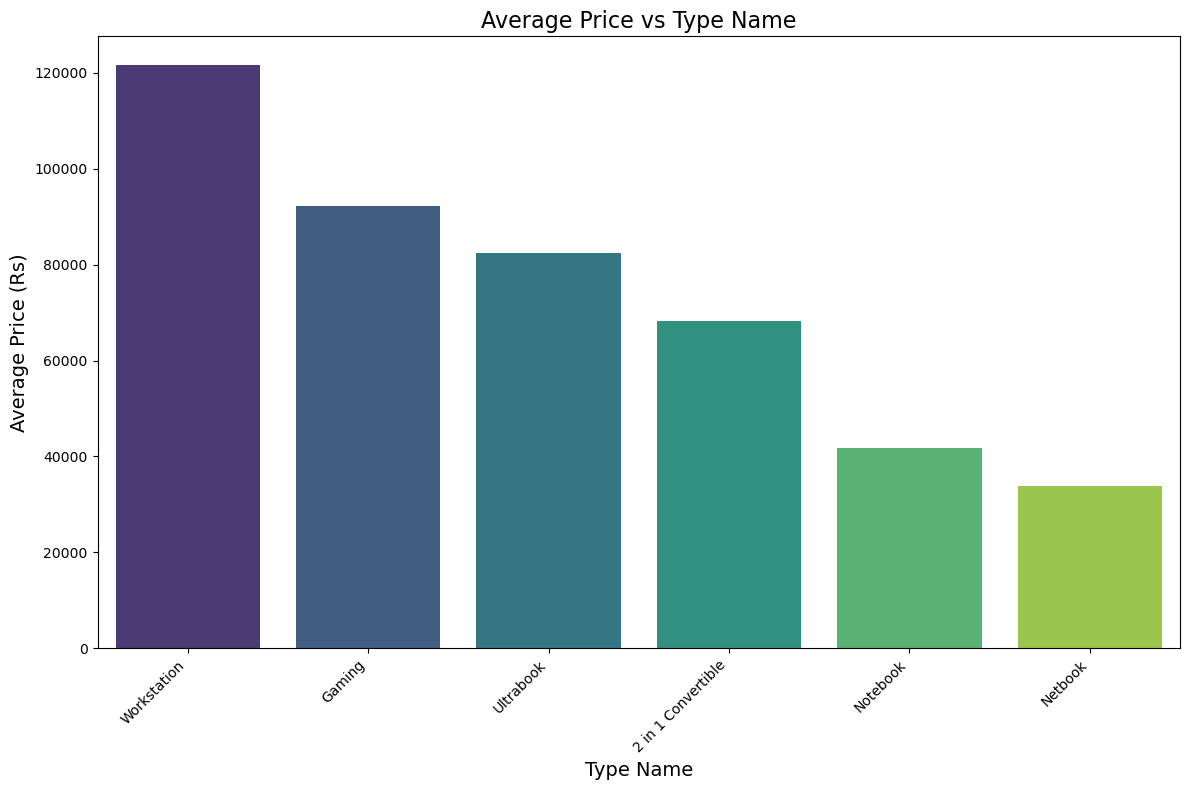

In [39]:
# Calculate mean prices for each RAM category
mean_prices = df.groupby('TypeName')['Price'].mean().reset_index()

# Sort the mean prices in descending order
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8)) 
sns.barplot(x='TypeName', y='Price', data=mean_prices, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Type Name', fontsize=14)
plt.ylabel('Average Price (Rs)', fontsize=14)
plt.title('Average Price vs Type Name', fontsize=16)
plt.tight_layout()  

# Display the plot
plt.show()


### Size of the Laptop

In [40]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [41]:
len(df['Inches'].value_counts())

18

**18 different sizes of laptops are available**

<Axes: xlabel='Inches', ylabel='Count'>

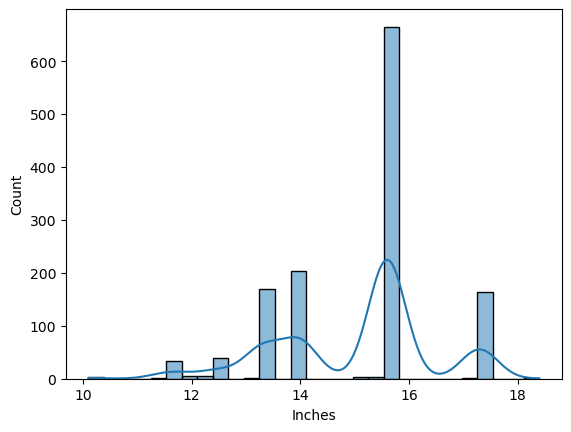

In [42]:
#size of the laptop
sns.histplot(df['Inches'], kde=True)

- **some of the laptops have rare screen sizes**
- **most of the laptops have 15.6 inch screen followed by 14 inch screen size and then 13.3 and 17.3 inch screen sizes.**

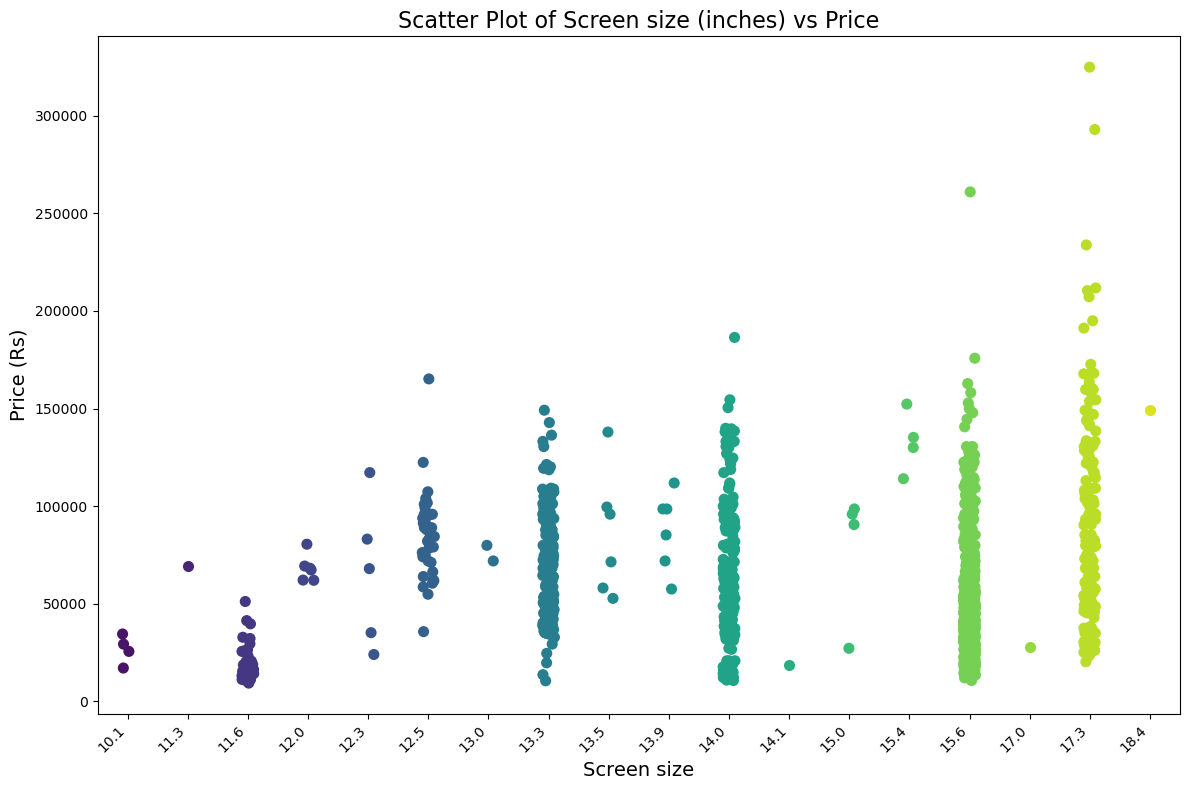

In [43]:
## Strip plot for TypeName vs Price
plt.figure(figsize=(12, 8))
sns.stripplot(x='Inches', y='Price', data=df, jitter=0.1, palette='viridis', size=8)
plt.xlabel('Screen size', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Scatter Plot of Screen size (inches) vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


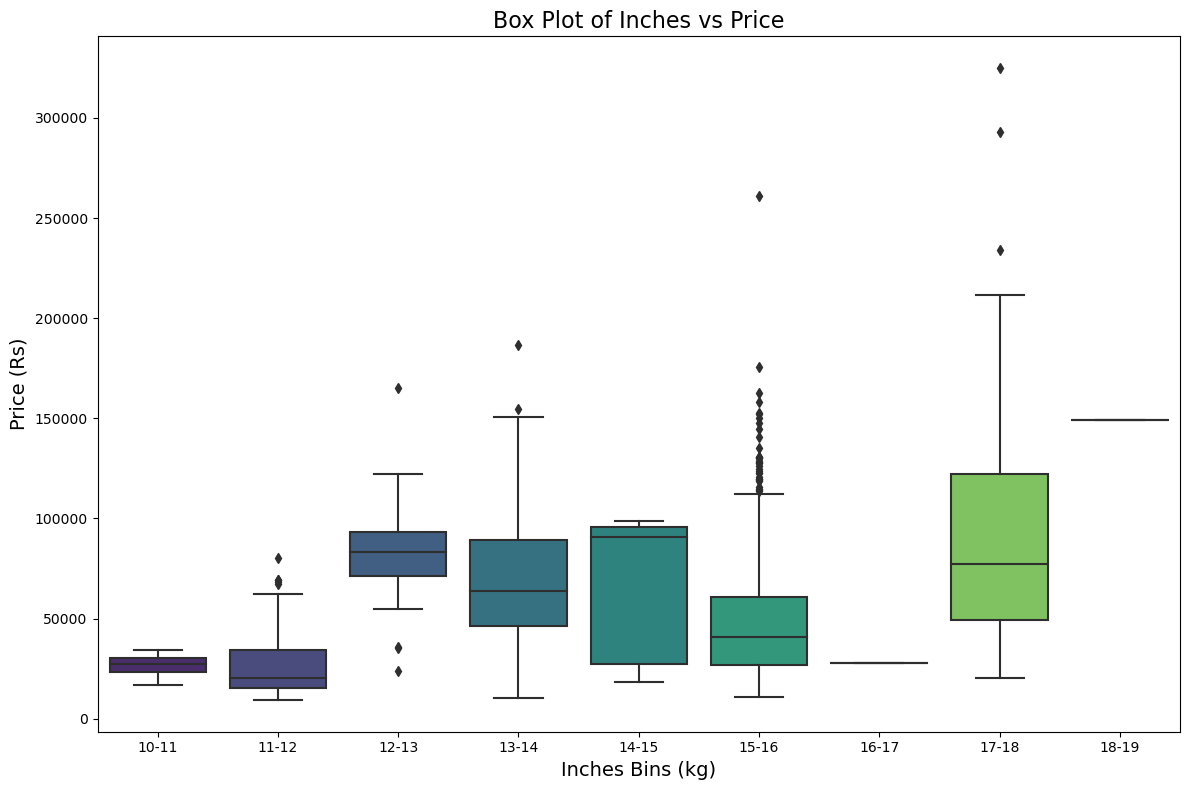

In [44]:
#Inches vs Price

# Bin the Weight into categories
bins = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]  # Adjust bin edges as necessary
labels = ['10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19']
df['Inches_Binned'] = pd.cut(df['Inches'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Inches_Binned', y='Price', data=df, palette='viridis')
plt.xlabel('Inches Bins (kg)', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Box Plot of Inches vs Price', fontsize=16)
plt.tight_layout()
plt.show()


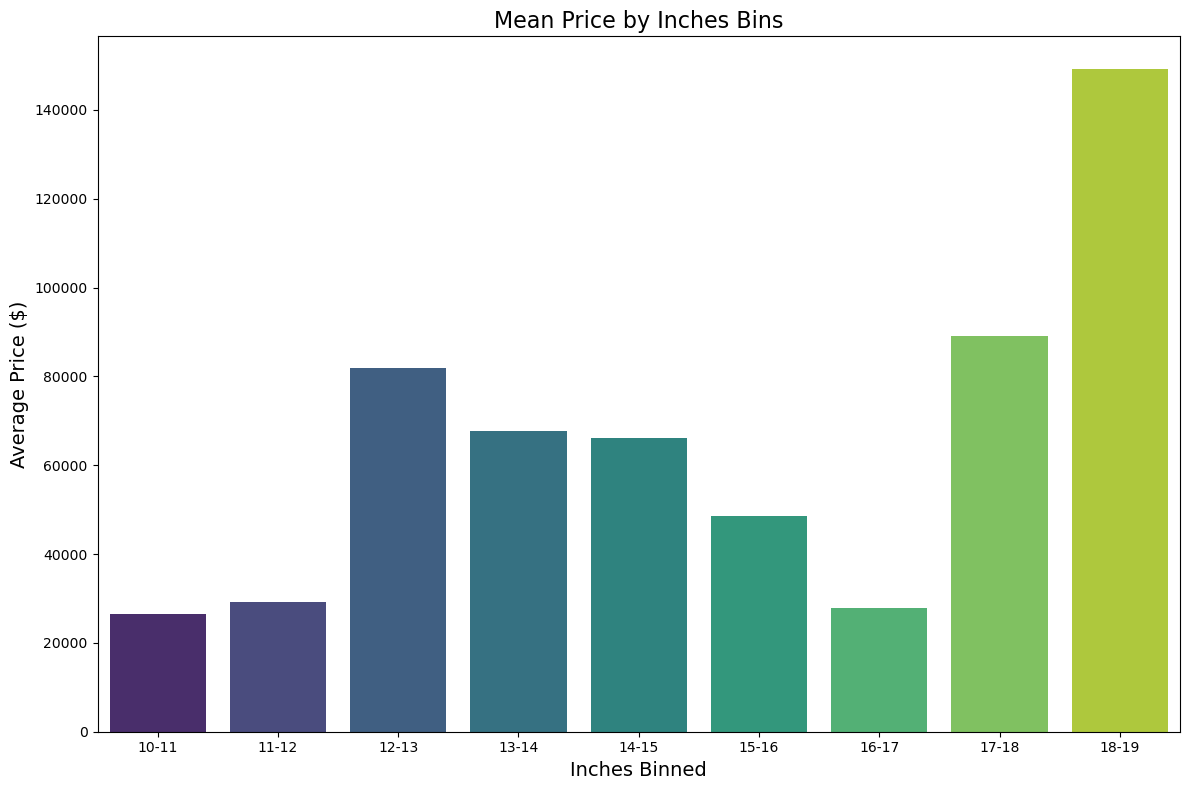

In [45]:
# Calculate mean prices for each Inches category
mean_prices = df.groupby('Inches_Binned')['Price'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Inches_Binned', y='Price', data=mean_prices, palette='viridis')
plt.xlabel('Inches Binned', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.title('Mean Price by Inches Bins', fontsize=16)
plt.tight_layout()
plt.show()

- **The price of laptops with screen size >17 inches are usually costlier as the mean price is generally 85K and above.**
- **Surprisingly the laptops with screen size 12-13 inches are generally costlier than the laptops having screen size 13-17 inches or 10-12 inches.** - further analysis needs to be done in order to know why is it so?

### Screen Resolution

In [46]:
# A lot of different information about the screen
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

- **Most of the laptops are not touchscreen but there are considerable amount of touchscreen laptops too in the dataset**
- **In General, the cost of touchscreen laptops are higher than the normal laptops**

**Lets check the above hypothesis**

In [47]:
# if the laptop is touch screen then 1 otherwise 0
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [48]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Weight_Binned,Inches_Binned,Touchscreen
604,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Linux,2.18,24775.20,2-3,15-16,0
571,HP,Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,1.94,20725.92,1-2,13-14,0
989,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.60,59620.32,1-2,13-14,0
1165,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,79813.44,2-3,15-16,0
776,Lenovo,Notebook,15.6,4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M2000M,Windows 7,2.50,126273.60,2-3,15-16,0


<Axes: >

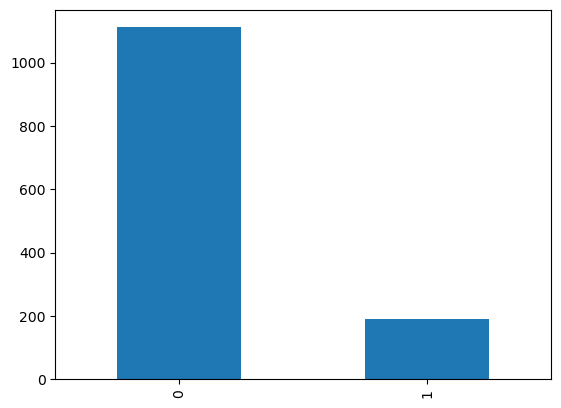

In [49]:
#plot for count of touchscreen and normal laptops
df['Touchscreen'].value_counts().plot(kind='bar')

In [50]:
df['Touchscreen'].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

**The touchscreen laptops are around 200 in count and the normal laptops are around 1100 in count**

<Axes: xlabel='Touchscreen', ylabel='Price'>

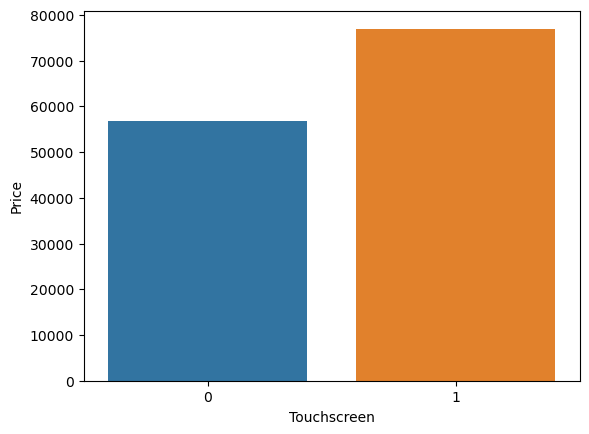

In [51]:
#touchscreen vs price plot
sns.barplot(x=df['Touchscreen'],y=df['Price'], ci =None)

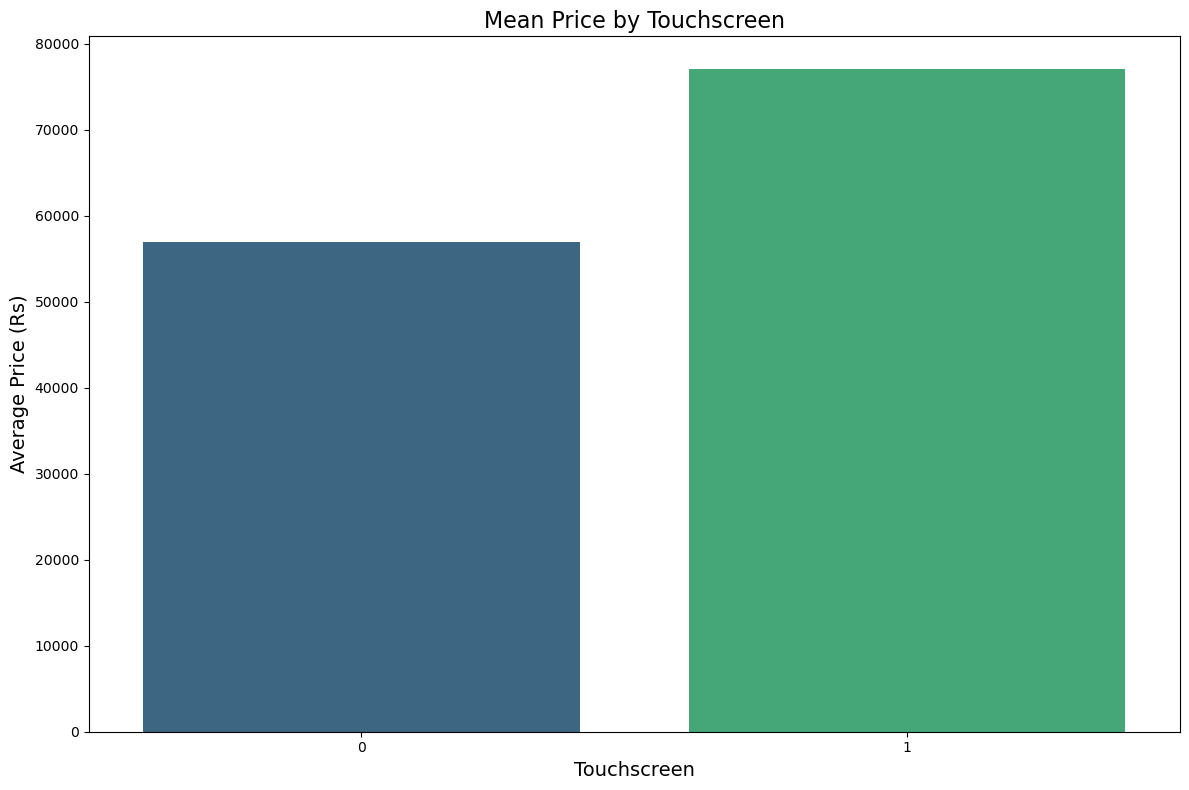

In [52]:
# Calculate mean prices for each Inches category
mean_prices = df.groupby('Touchscreen')['Price'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Touchscreen', y='Price', data=mean_prices, palette='viridis')
plt.xlabel('Touchscreen', fontsize=14)
plt.ylabel('Average Price (Rs)', fontsize=14)
plt.title('Mean Price by Touchscreen', fontsize=16)
plt.tight_layout()
plt.show()

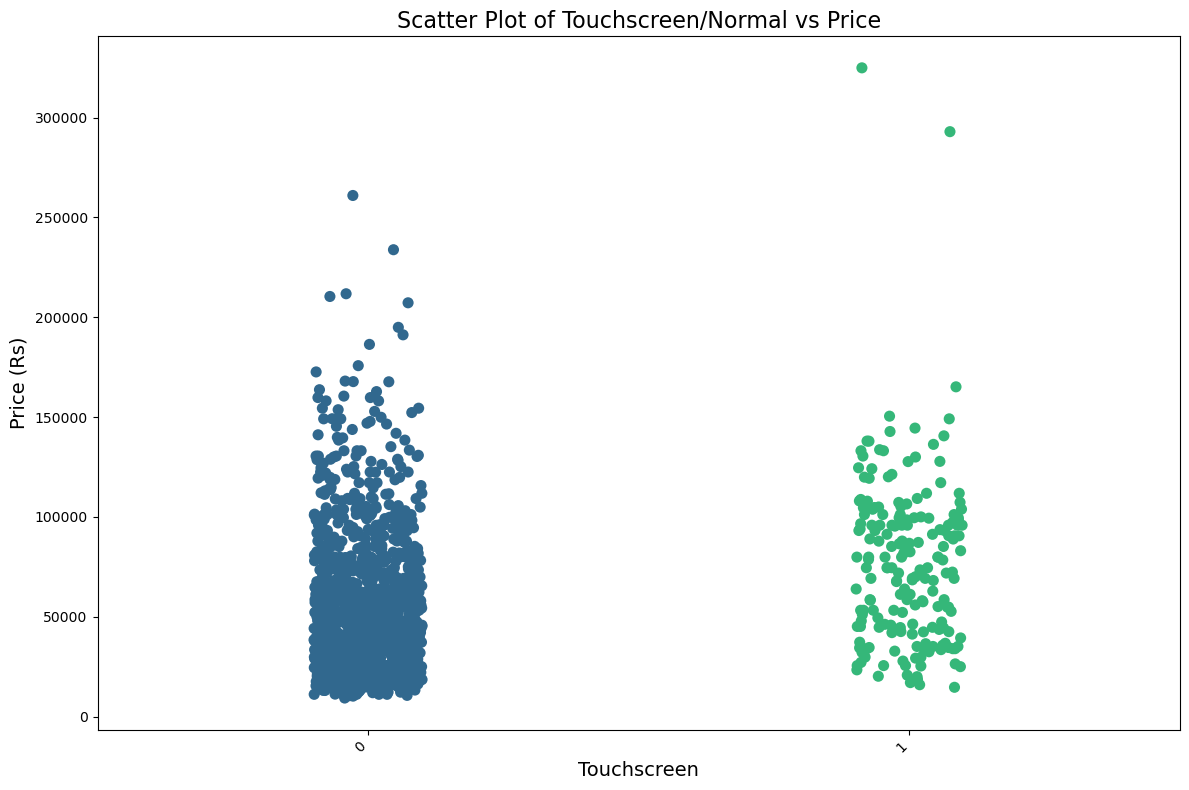

In [53]:
## Strip plot for TypeName vs Price
plt.figure(figsize=(12, 8))
sns.stripplot(x='Touchscreen', y='Price', data=df, jitter=0.1, palette='viridis', size=8)
plt.xlabel('Touchscreen', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Scatter Plot of Touchscreen/Normal vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Axes: xlabel='Touchscreen', ylabel='Price'>

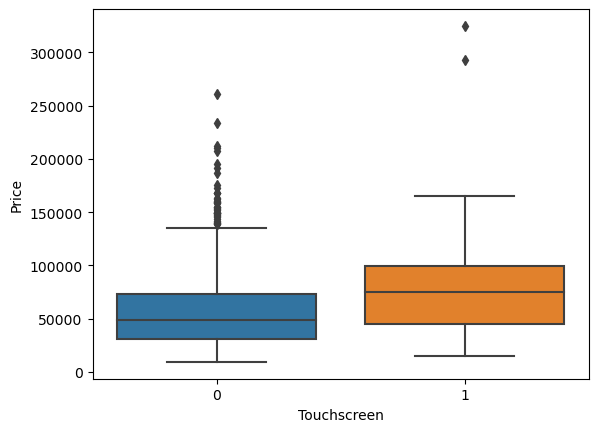

In [54]:
sns.boxplot(x='Touchscreen', y='Price', data=df)

- **Upar k dono bar plots same hi h toh yaad rakhne wali baat ye h ki zabardasti ka style maarne se analysis pe koi fark nahi padta**
- **Touchscreen laptops are usually costlier than the normal laptops (not clear from the strip plot - further multivariate analysis is required). There will be some other parameters that will an important role in the pricing of the laptops.**
- **zyada clear picture hume yaha pe stripplot de rha h (count of laptops aur range of price - dono ka idea lagg paa rha h)**
- **stripplot hume pricing ka acha idea nahi de rha h isiliye boxplot ko use kiya h**

**Ips type of screen resolution check karte h abb**

**An IPS (In-Plane Switching) screen is a type of LCD (Liquid Crystal Display) technology used in laptops and other devices. IPS screens are known for their superior display quality compared to other types of LCDs, such as TN (Twisted Nematic) panels.**

In [55]:
#if screen has ips resolution then 1 otherwise 0
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [56]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Weight_Binned,Inches_Binned,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1-2,13-14,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1-2,13-14,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1-2,15-16,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1-2,15-16,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1-2,13-14,0,1


0    938
1    365
Name: Ips, dtype: int64


<Axes: >

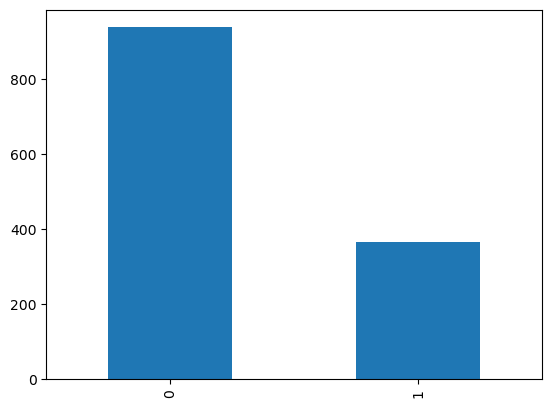

In [57]:
# Kitne laptops mai Ips screen hai - count k liye plot
print(df['Ips'].value_counts())
df['Ips'].value_counts().plot(kind='bar')

**Around 350+ laptops have IPS screens and rest do not have them**

<Axes: xlabel='Ips', ylabel='Price'>

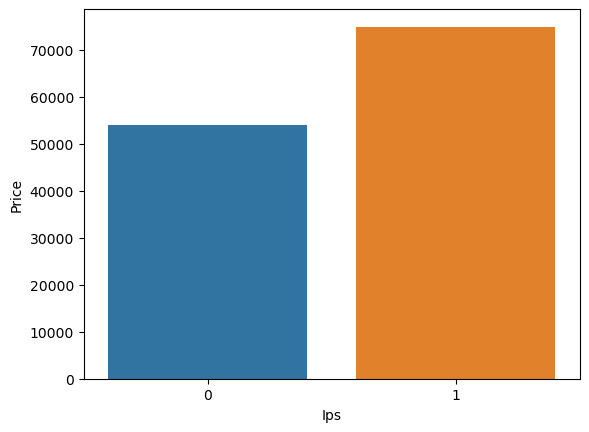

In [58]:
sns.barplot(x=df['Ips'],y=df['Price'], ci=None)

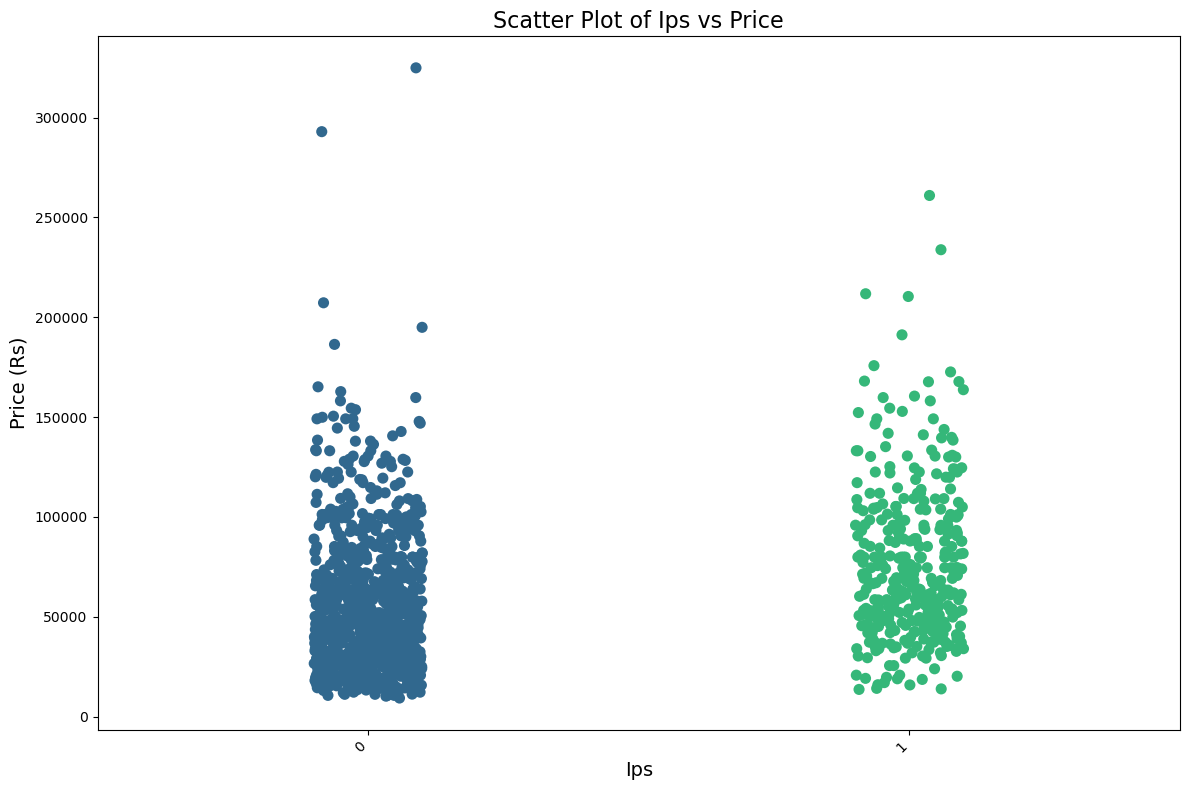

In [59]:
## Strip plot for TypeName vs Price
plt.figure(figsize=(12, 8))
sns.stripplot(x='Ips', y='Price', data=df, jitter=0.1, palette='viridis', size=8)
plt.xlabel('Ips', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Scatter Plot of Ips vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Axes: xlabel='Ips', ylabel='Price'>

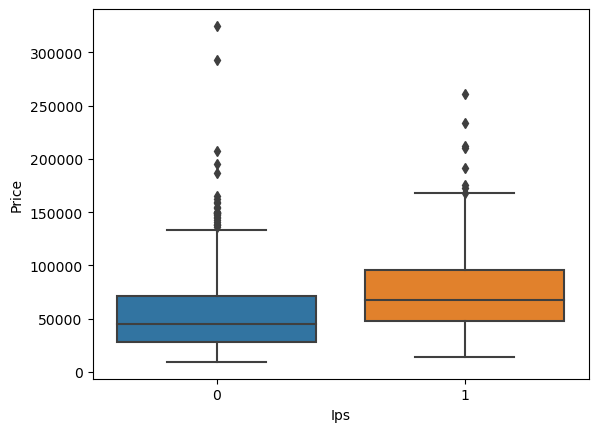

In [60]:
# boxplot to confirm the relation between Ips and pricing
sns.boxplot(x='Ips', y='Price', data=df)

**Ips laptops are usually costlier than the rest**

**Abb Screen resolution ko dekhte h**

In [61]:
#in order to break the screen resolution in (x_res)*(y_res)
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [62]:
#y_resolution seperated successfully but still a problem with the x_resolution
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [63]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Weight_Binned,Inches_Binned,Touchscreen,Ips,X_res,Y_res
1236,HP,Ultrabook,14.0,2560x1440,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,117119.5632,1-2,13-14,0,0,2560,1440
982,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,Windows 10,2.20,29250.7200,2-3,15-16,0,0,Full HD 1920,1080
1210,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8,512GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.92,68145.1200,0-1,11-12,0,1,IPS Panel Retina Display 2304,1440
1049,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,15339.3120,1-2,11-12,0,0,1366,768
981,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,1.20,63669.6000,1-2,13-14,0,0,Full HD 1920,1080


In [64]:
#x_res seperated successfully
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

#code's working-
# df['X_res']: Selects the column X_res from the DataFrame df.

# .str.replace(',',''): Removes all commas from the strings in the X_res column. This is useful if the numbers in the strings are formatted with commas (e.g., "1,234.56" to "1234.56").

#.str.findall(r'(\d+\.?\d+)'): Uses a regular expression to find all substrings in each string that match the pattern (\d+\.?\d+). This pattern matches numbers, which can include decimal points.

# \d+: Matches one or more digits.
# \.?: Matches zero or one decimal point.
# \d+: Matches one or more digits after the decimal point (if it exists).
# .apply(lambda x: x[0]): Applies a lambda function to each list of matches (the result of findall). The lambda function lambda x: x[0] takes the first element of each list of matches.

In [65]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Weight_Binned,Inches_Binned,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1-2,13-14,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1-2,13-14,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1-2,15-16,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1-2,15-16,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1-2,13-14,0,1,2560,1600


In [66]:
#converting the x_res and y_res in integers
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [67]:
df['X_res'].value_counts()

1920    846
1366    308
3840     43
2560     29
3200     27
1600     23
2304      6
2256      6
1440      4
2880      4
2400      4
2160      2
2736      1
Name: X_res, dtype: int64

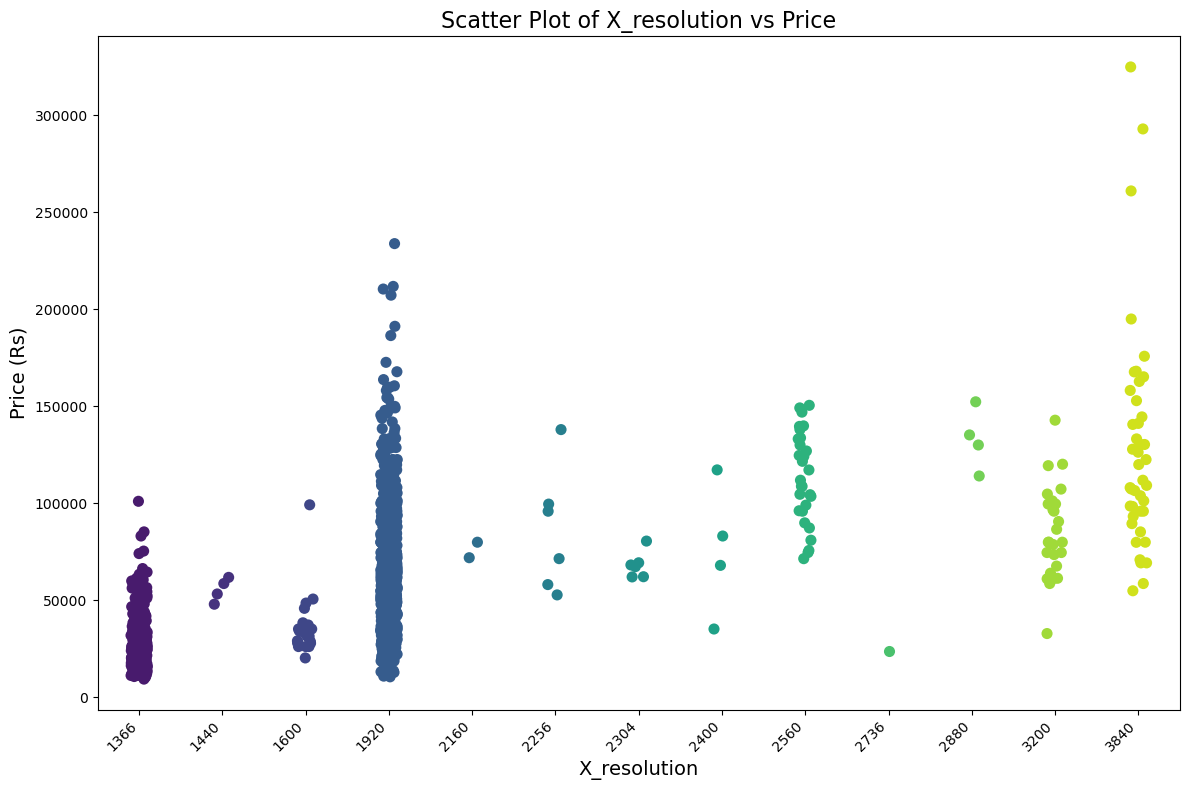

In [68]:
## Strip plot for TypeName vs Price
plt.figure(figsize=(12, 8))
sns.stripplot(x='X_res', y='Price', data=df, jitter=0.1, palette='viridis', size=8)
plt.xlabel('X_resolution', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Scatter Plot of X_resolution vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


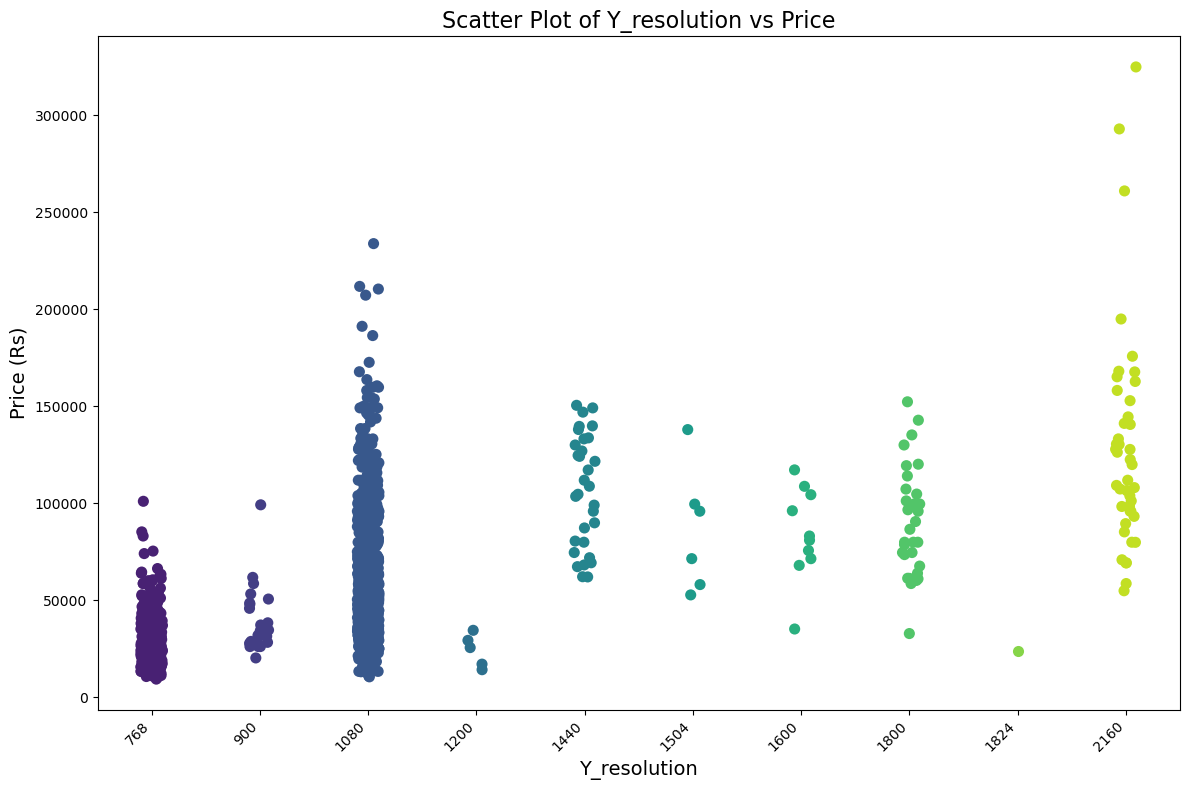

In [69]:
## Strip plot for TypeName vs Price
plt.figure(figsize=(12, 8))
sns.stripplot(x='Y_res', y='Price', data=df, jitter=0.1, palette='viridis', size=8)
plt.xlabel('Y_resolution', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Scatter Plot of Y_resolution vs Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1303 non-null   object  
 1   TypeName          1303 non-null   object  
 2   Inches            1303 non-null   float64 
 3   ScreenResolution  1303 non-null   object  
 4   Cpu               1303 non-null   object  
 5   Ram               1303 non-null   int64   
 6   Memory            1303 non-null   object  
 7   Gpu               1303 non-null   object  
 8   OpSys             1303 non-null   object  
 9   Weight            1303 non-null   float64 
 10  Price             1303 non-null   float64 
 11  Weight_Binned     1303 non-null   category
 12  Inches_Binned     1303 non-null   category
 13  Touchscreen       1303 non-null   int64   
 14  Ips               1303 non-null   int64   
 15  X_res             1303 non-null   int32   
 16  Y_res             1303 n

**Saare numerical features ka correlation check kar lete h aage badhne se pehle**

In [71]:
#correlation w.r.t. price
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

**sbse zyada correlation price ka Ram k sath h followed by X-resolution and y_resolution**

**Ek new parameter feature create kar rhe h - ppi (price per inches) - google pe iske baare mai pata chala**

### New Feature = PPI (price per inches)

In [72]:
#creating a new column ppi= price per inches using its formula (google)
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Weight_Binned,Inches_Binned,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1-2,13-14,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1-2,13-14,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1-2,15-16,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1-2,15-16,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1-2,13-14,0,1,2560,1600,226.983005


In [73]:
df['ppi'].value_counts()

141.211998    430
100.454670    212
157.350512    133
127.335675    131
165.632118    110
111.935204     45
135.094211     31
276.053530     27
176.232574     25
282.423996     23
106.113062     22
209.800683     18
125.367428      9
117.826530      8
254.671349      7
331.264236      7
226.983005      6
200.842560      6
226.415547      6
234.507400      4
127.677940      4
352.465147      4
224.173809      4
146.860478      4
158.482530      4
220.534624      4
169.780899      2
189.905791      2
316.965060      2
199.692071      2
90.583402       2
220.842824      2
267.338436      1
119.723216      1
107.985646      1
161.725391      1
111.141337      1
194.947537      1
234.976765      1
Name: ppi, dtype: int64

In [74]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

**ppi ka correlation bhi theek thaak h price k saath**

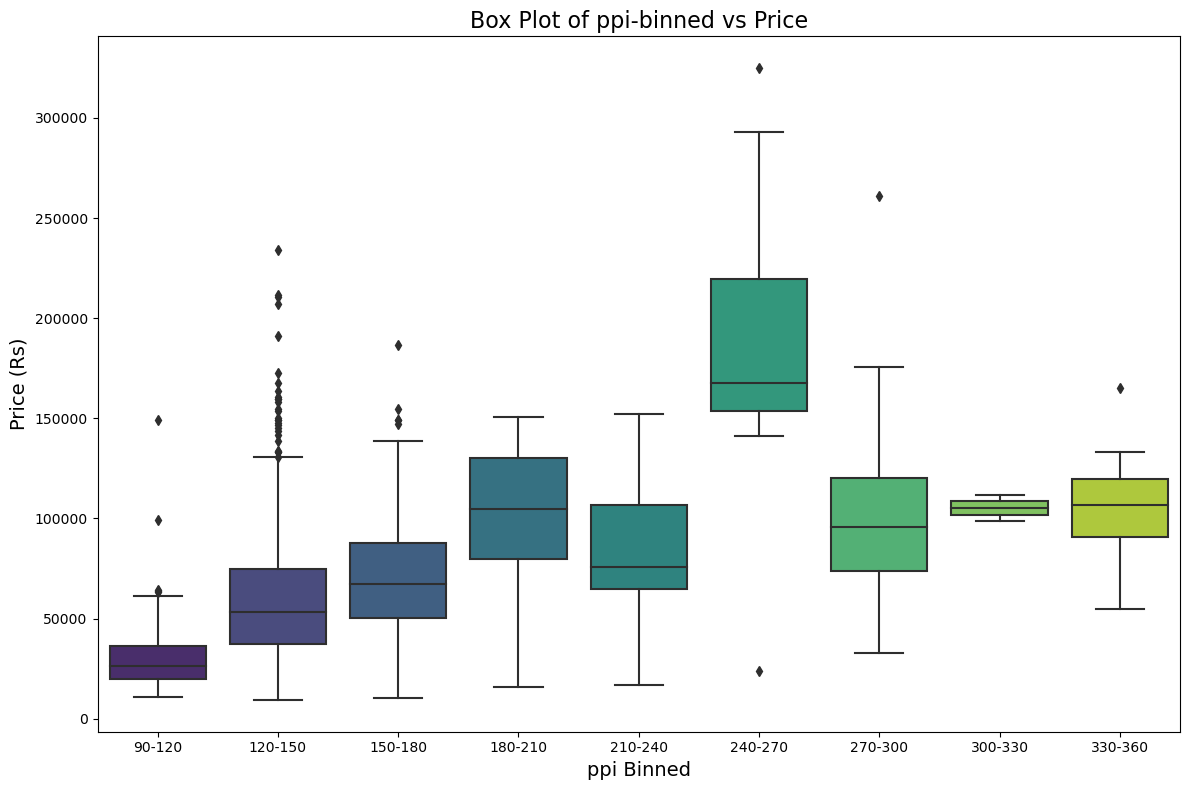

In [75]:
#ppi vs Price

# Bin the Weight into categories
bins = [90, 120, 150, 180, 210, 240, 270, 300, 330, 360]  # Adjust bin edges as necessary
labels = ['90-120', '120-150', '150-180', '180-210', '210-240', '240-270', '270-300', '300-330', '330-360']
df['ppi_Binned'] = pd.cut(df['ppi'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))
sns.boxplot(x='ppi_Binned', y='Price', data=df, palette='viridis')
plt.xlabel('ppi Binned', fontsize=14)
plt.ylabel('Price (Rs)', fontsize=14)
plt.title('Box Plot of ppi-binned vs Price', fontsize=16)
plt.tight_layout()
plt.show()


**ppi mai definitely price k saath ek increasing relation exist kar rha h and hence the correlation**

**Suggestion - ScreenResolution feature se HD aur uske types ko bhi extract kiya jaa sakta h**- Try kar sakte h (mai nahi karunga)

**ScreenResolution ka kaam khatam abb isse delete kar sakte h**

In [76]:
#dropping screenresolution 
df.drop(columns=['ScreenResolution'],inplace=True)

In [77]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Weight_Binned,Inches_Binned,Touchscreen,Ips,X_res,Y_res,ppi,ppi_Binned
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1-2,13-14,0,1,2560,1600,226.983005,210-240
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1-2,13-14,0,0,1440,900,127.677940,120-150
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1-2,15-16,0,0,1920,1080,141.211998,120-150
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1-2,15-16,0,1,2880,1800,220.534624,210-240
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1-2,13-14,0,1,2560,1600,226.983005,210-240


In [78]:
df.corr()

,Inches,Ram,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.071245,-0.095404,-0.414804
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.433121,0.424437,0.303763
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.032880,-0.053846,-0.323240
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.556529,0.552809,0.473487
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.351066,0.357930,0.460587
Ips,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.281457,0.289030,0.300879
X_res,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,1.000000,0.994219,0.931217
Y_res,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,0.994219,1.000000,0.939363
ppi,-0.414804,0.303763,-0.323240,0.473487,0.460587,0.300879,0.931217,0.939363,1.000000


<Axes: >

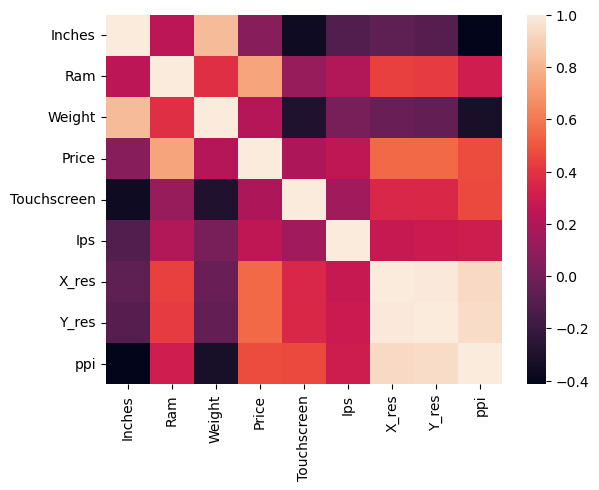

In [79]:
sns.heatmap(df.corr())

- **humne ppi feature already inches, x-resolution and y-resoltuion ko use karke banaya h toh usme already inn teeno features ki information h---> isiliye hum inn teeno features ko bhi delete kar sakte h**

- **Aur jitne bhi binned features banaye the humne plots se pricing k analysis karne k liye unhe bhi delete kar rhe h**

In [80]:
#since we have already created 'ppi'column therefore removing columns such as 'Inches', 'X-res', 'Y-res', 'Weight_Binned', 'Inches_Binned', 'ppi_Binned'
df.drop(columns=['Inches','X_res','Y_res', 'Weight_Binned', 'Inches_Binned', 'ppi_Binned'],inplace=True)

In [81]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### CPU

In [82]:
#cpu category
print(df['Cpu'].value_counts())
print("-"*40)
print(len(df['Cpu'].value_counts()))

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64
----------------------------------------
118


**Total 118 categories of CPU's --> therefore needs to be rectified**

**Extracting first 3 words from the cpu feature ---> which I think represents cpu name**

In [83]:
#extracting first three words from the cpu category column
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [84]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [85]:
# now checking the number of categories
df['Cpu Name'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [86]:
len(df['Cpu Name'].value_counts())

40

**40 categories in the CPU name itself --> still a problem**

**Intel i7, i5 aur i3 ko rakhenege aur baaki intel processors ko ek new category "other intel processor" mai merge kar denge (number of categories ko reduce karne k liye), iske alawa koi bhi processor h (AMD + samsung) usse ek new category "AMD processor" mai hi merge kar denge**

In [87]:
#breaking the whole category into 5 main categories = intel core i3/i5/i7 otherwise 'oter intel processor' or else 'amd processor'
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [88]:
#storing these categories in a new column - Cpu brand
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [89]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

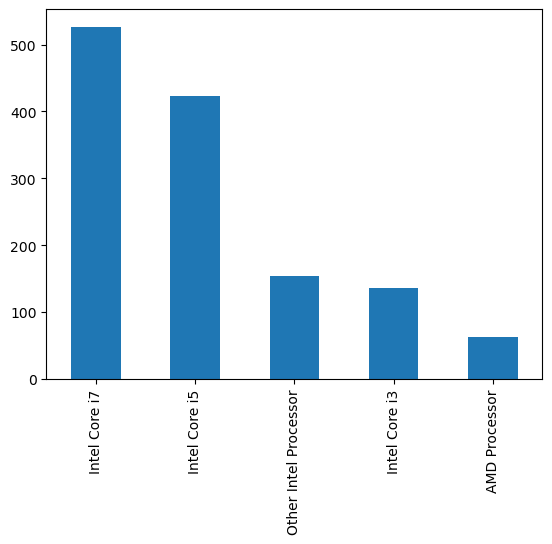

In [90]:
#cpu brand wise counts
df['Cpu brand'].value_counts().plot(kind='bar')

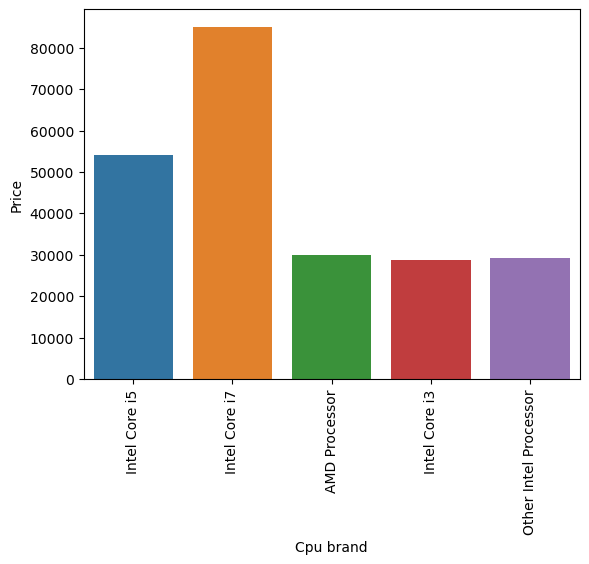

In [91]:
#cpu brand vs price
sns.barplot(x=df['Cpu brand'],y=df['Price'],ci=None)
plt.xticks(rotation='vertical')
plt.show()

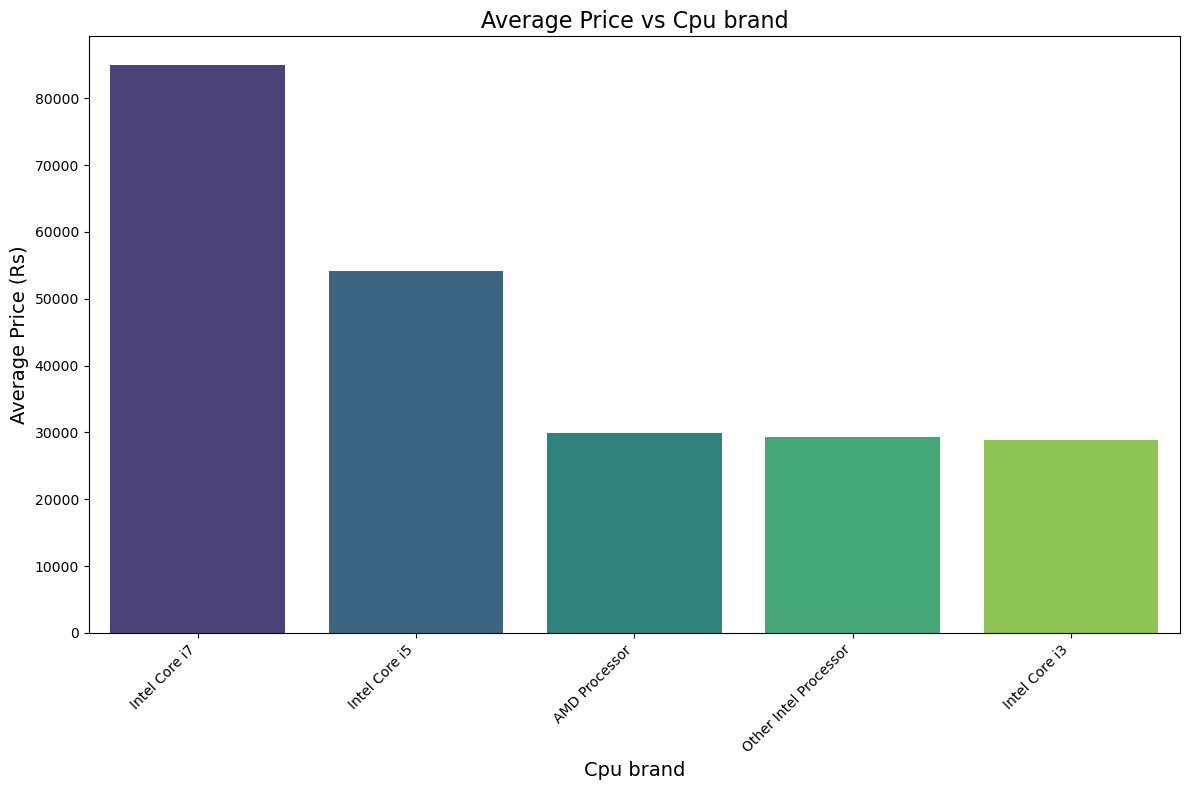

In [92]:
# Calculate mean prices for each RAM category
mean_prices = df.groupby('Cpu brand')['Price'].mean().reset_index()

# Sort the mean prices in descending order
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8)) 
sns.barplot(x='Cpu brand', y='Price', data=mean_prices, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Cpu brand', fontsize=14)
plt.ylabel('Average Price (Rs)', fontsize=14)
plt.title('Average Price vs Cpu brand', fontsize=16)
plt.tight_layout()  

# Display the plot
plt.show()


**Mean price of laptops belonging to Intel Core i7 category are cosliest followed by i5 then amd and then i3**

**CPU aur CPU Name features ka abb koi kaam nahi ---> Deleting it**

In [93]:
#dropping the 'Cpu' and 'Cpu Name' columns = unnecessary
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [94]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


### Memory

In [95]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [96]:
#breaking the 'Memory' column into 4 new columns i.e HDD, SSD, Hybrid, Flash

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True) # Jaha bhi (.0 -> dot 0) h usse blank se replace kar diya (dot 0--> ko delete kar diya)
df["Memory"] = df["Memory"].str.replace('GB', '') #jaha jaha bhi GB tha usse blank se replace kar diya (basically GB word hata diya)
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [97]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,0,0,0,0,0,0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,0,0,0,0,0,0,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,0,1,0,0,0,0,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,0,0,0,0,0,0,1000,0,0,0


In [98]:
df[['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage']]

,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,128,0,0,1,0,0,0,0,0,0
1,128,0,0,0,0,1,0,0,0,0
2,256,0,0,1,0,0,0,0,0,0
3,512,0,0,1,0,0,0,0,0,0
4,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1298,128,0,0,1,0,0,0,0,0,0
1299,512,0,0,1,0,0,0,0,0,0
1300,64,0,0,0,0,1,0,0,0,0
1301,1000,0,1,0,0,0,0,0,0,0


In [99]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [100]:
df.sample(15)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
832,Asus,Notebook,4,1000 HDD,Nvidia GeForce 920,Linux,2.100,27652.320,0,0,141.211998,Intel Core i5,1000,0,0,0
174,HP,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.500,49177.440,0,0,127.335675,Intel Core i5,0,256,0,0
883,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce 940MX,Windows 10,2.200,35644.320,0,1,141.211998,Intel Core i7,1000,0,0,0
457,Microsoft,Ultrabook,4,128 SSD,Intel HD Graphics 615,Windows 10 S,1.252,52693.920,1,0,200.842560,Other Intel Processor,0,128,0,0
276,Dell,Notebook,8,128 SSD + 1000 HDD,AMD Radeon 530,Linux,2.800,58554.720,0,0,127.335675,Intel Core i7,1000,128,0,0
388,Dell,Workstation,8,256 SSD,Nvidia Quadro M1200,Windows 10,2.000,113752.800,0,1,141.211998,Intel Core i7,0,256,0,0
364,Lenovo,Notebook,8,256 SSD,Nvidia GeForce 920MX,No OS,2.200,26586.720,0,0,100.454670,Intel Core i3,0,256,0,0
13,Dell,Notebook,4,256 SSD,AMD Radeon R5 M430,Windows 10,2.200,26581.392,0,0,141.211998,Intel Core i3,0,256,0,0
964,HP,Notebook,8,1000 HDD,Nvidia GeForce 930MX,Windows 10,2.040,45101.520,0,0,100.454670,Intel Core i5,1000,0,0,0
891,HP,2 in 1 Convertible,16,256 SSD,Intel HD Graphics 620,Windows 10,1.420,74538.720,1,0,276.053530,Intel Core i7,0,256,0,0


In [101]:
#now dropping the memory column
df.drop(columns=['Memory'],inplace=True)

In [102]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


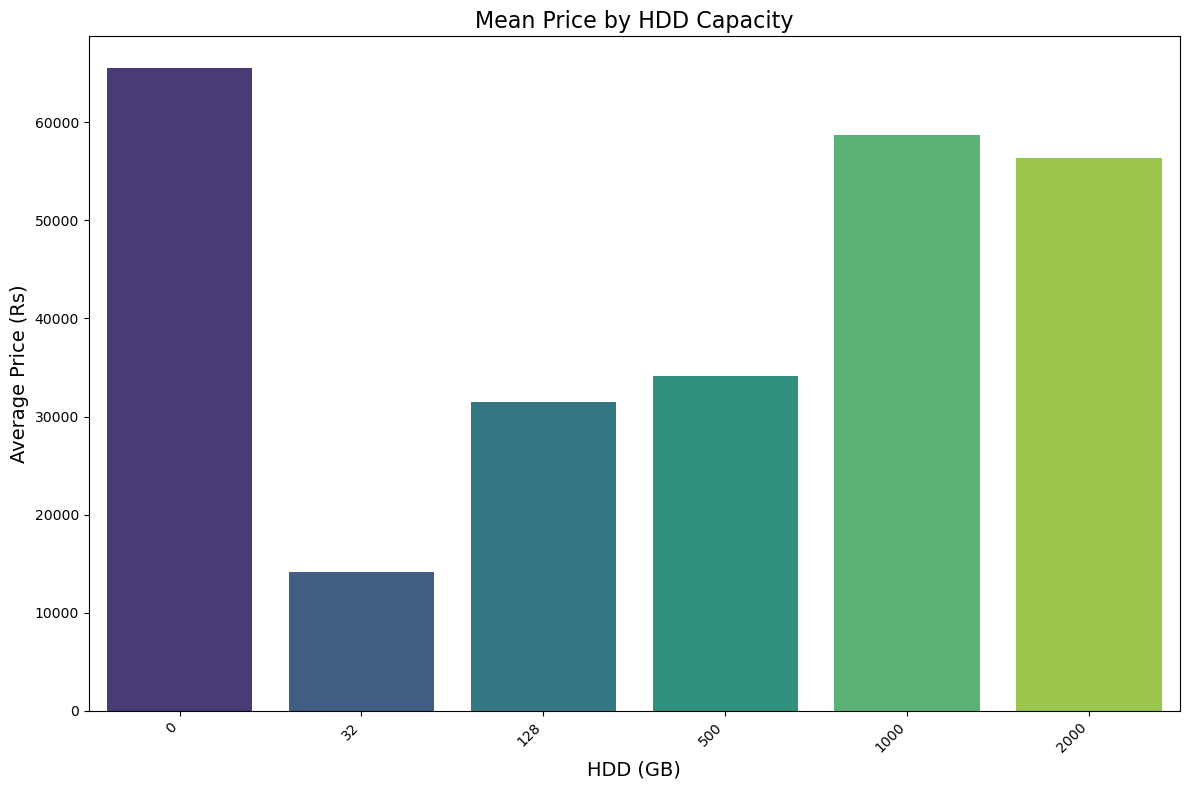

In [103]:
## HDD vs price

# Calculate the mean prices for each HDD category
mean_prices = df.groupby('HDD')['Price'].mean().reset_index()

# Sort the mean prices in descending order for better visualization
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='HDD', y='Price', data=mean_prices, palette='viridis', ci=None)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('HDD (GB)', fontsize=14)
plt.ylabel('Average Price (Rs)', fontsize=14)
plt.title('Mean Price by HDD Capacity', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


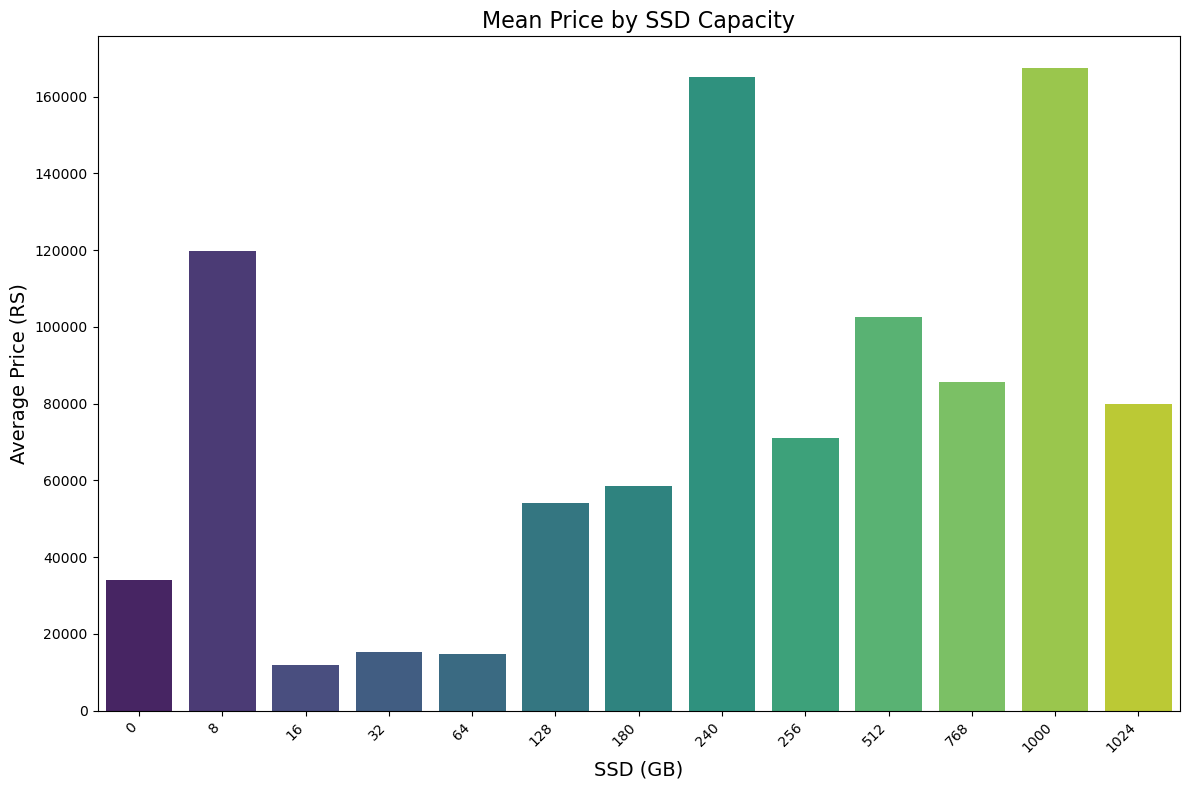

In [104]:
## SSD vs price

# Calculate the mean prices for each HDD category
mean_prices = df.groupby('SSD')['Price'].mean().reset_index()

# Sort the mean prices in descending order for better visualization
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='SSD', y='Price', data=mean_prices, palette='viridis', ci=None)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('SSD (GB)', fontsize=14)
plt.ylabel('Average Price (RS)', fontsize=14)
plt.title('Mean Price by SSD Capacity', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


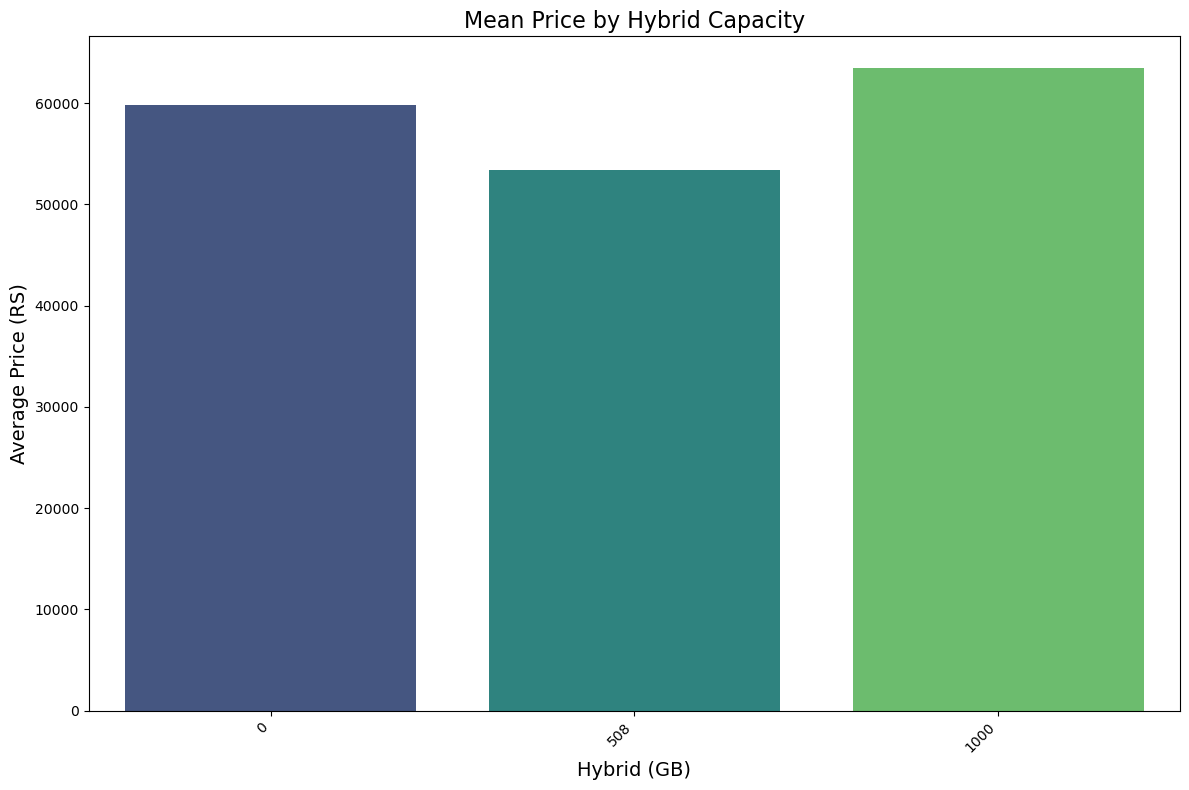

In [105]:
## Hybrid vs price

# Calculate the mean prices for each HDD category
mean_prices = df.groupby('Hybrid')['Price'].mean().reset_index()

# Sort the mean prices in descending order for better visualization
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Hybrid', y='Price', data=mean_prices, palette='viridis', ci=None)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Hybrid (GB)', fontsize=14)
plt.ylabel('Average Price (RS)', fontsize=14)
plt.title('Mean Price by Hybrid Capacity', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


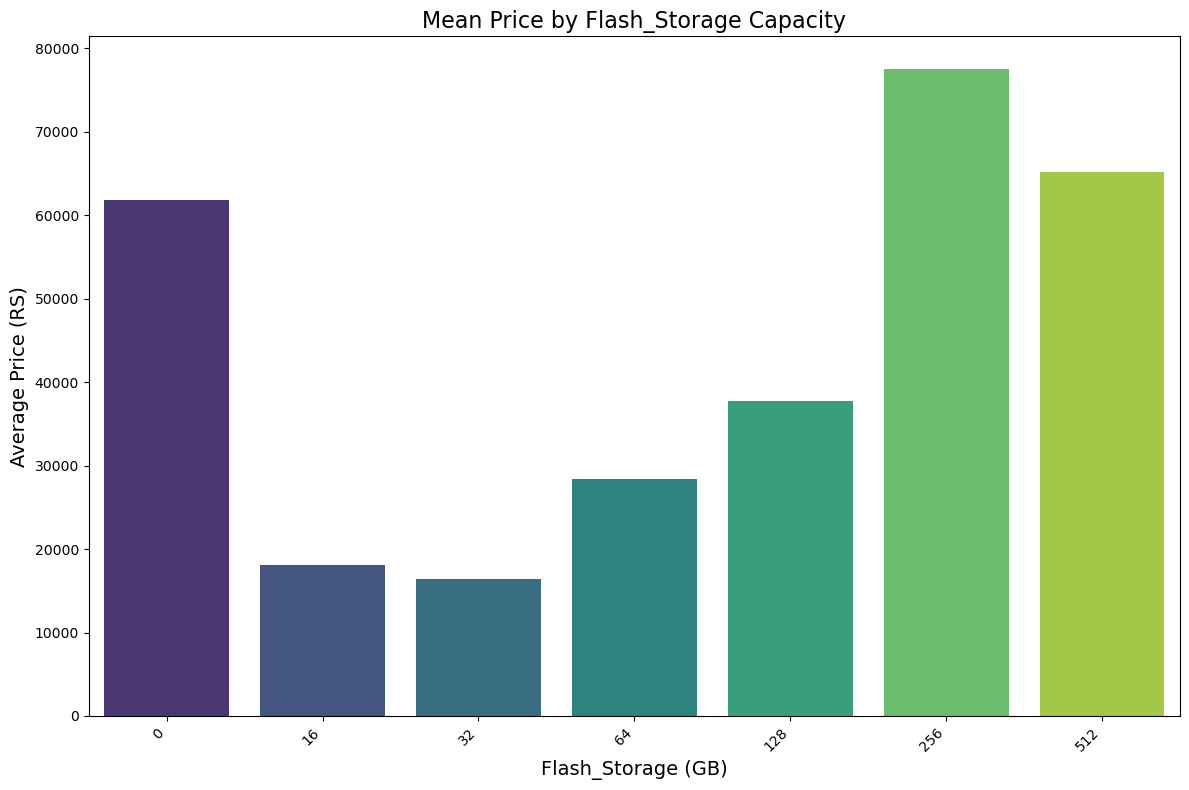

In [106]:
## Flash_Storage vs price

# Calculate the mean prices for each HDD category
mean_prices = df.groupby('Flash_Storage')['Price'].mean().reset_index()

# Sort the mean prices in descending order for better visualization
mean_prices = mean_prices.sort_values(by='Price', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Flash_Storage', y='Price', data=mean_prices, palette='viridis', ci=None)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Flash_Storage (GB)', fontsize=14)
plt.ylabel('Average Price (RS)', fontsize=14)
plt.title('Mean Price by Flash_Storage Capacity', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


In [107]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

**Hybrid aur flash storage ko delete kar rhe h kyunki unka correlation bohot zyada hi kam h i.e. +- <5%**

In [108]:
#dropping 'Hybrid' and 'Flash_Storage' because of very less correlation
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


**AAP chaho toh rakh bhi sakte ho - Model k saath experiment karke dekhna padega ki rakhne se performance improve ho rahi h ya kharaab ho rhi h**

### Gpu 

In [109]:
#Gpu column
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [110]:
len(df['Gpu'].value_counts())

110

**There are a total of 110 categories of GPU**

**sabse pehle hum log GPU k brand name ko extract karenge jaise ki "Intel, AMD, Nvidia" etc**

In [111]:
#extracting GPU brand name from the GPU column
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [112]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [113]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

**Sirf 4 brands k hi GPU h humare data mai**

**Usme bhi ARM category k GPU mai sirf 1 hi observation aa rhi h--> uss 1 observation ko remove/delete hi kar dete h**

In [114]:
#dropping the row contating "ARM" as GPU brand (only 1 row)
df = df[df['Gpu brand'] != 'ARM']

In [115]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

**Finally sirf 3 GPU k brands hi h abb humare pass**

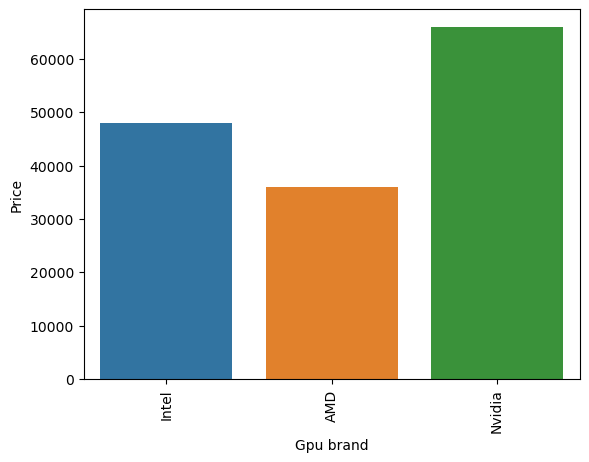

In [116]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median, ci=None)
plt.xticks(rotation='vertical')
plt.show()

- **Nvidia k GPU wale laptops generally costly hote h - hum logo ne ye analysis median k basis pe ki h**
- **Analysis ko confirm karne k liye aur bhi plots ka use kar sakte h**

In [117]:
#dropping the GPU column
df.drop(columns=['Gpu'],inplace=True)

In [118]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### Operating System

In [119]:
#OpSys column
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [120]:
len(df['OpSys'].value_counts())

9

**Total 9 alag alag categories h operating systems ki**

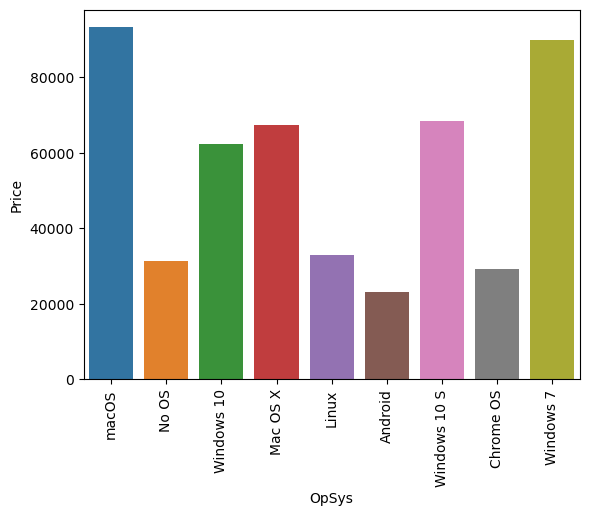

In [121]:
#os wise price plot - mean price
sns.barplot(x=df['OpSys'],y=df['Price'], ci=None)
plt.xticks(rotation='vertical')
plt.show()

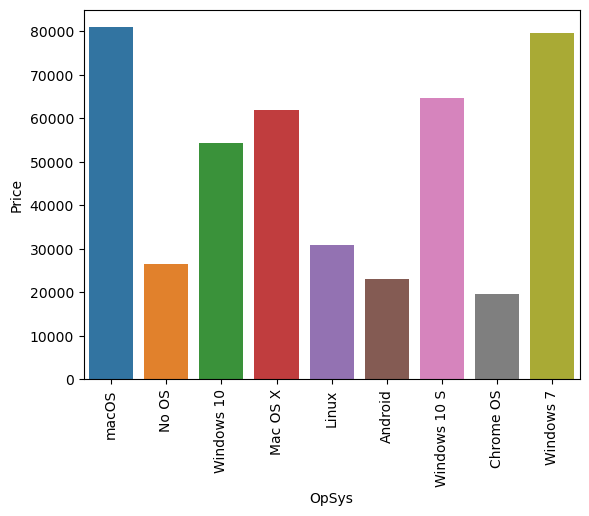

In [122]:
#os wise price plot - median price
sns.barplot(x=df['OpSys'],y=df['Price'], ci=None, estimator ='median')
plt.xticks(rotation='vertical')
plt.show()

**Price of Mac os laptops and window 7 laptops are really high as compared to the rest**

**Saare operating systems ko sirf 3 parent categories mai convert kar rhe h**

In [123]:
# converting all the os systems into 3 categories only, 'windows', 'mac', 'Others/No OS/Linux'
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [124]:
## inn changes ko ek new feature "os" mai store kar rhe h

In [125]:
df['os'] = df['OpSys'].apply(cat_os)

In [126]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


**Abb hum 'OpSys' feature ko hata sakte h (delete)**

In [127]:
df.drop(columns=['OpSys'],inplace=True)

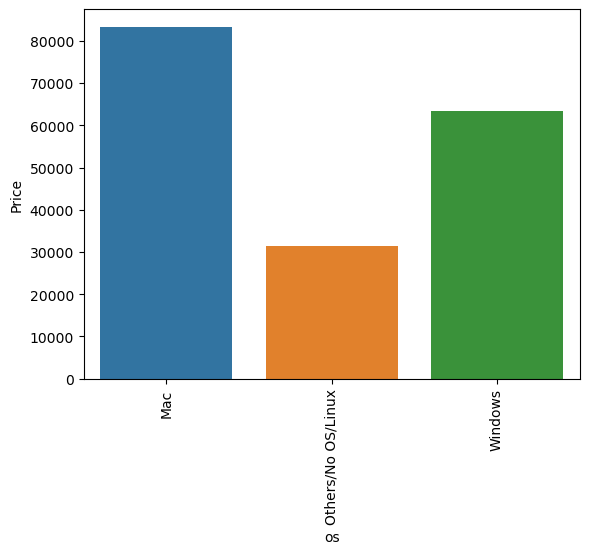

In [128]:
sns.barplot(x=df['os'],y=df['Price'], ci=None)
plt.xticks(rotation='vertical')
plt.show()

**Overall Mac operating system (OS) k laptops zyada costly h aur fir windows OS aur last mai Others**

### Correlation plot

In [129]:
#correlation of weight is 0.2 with price
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

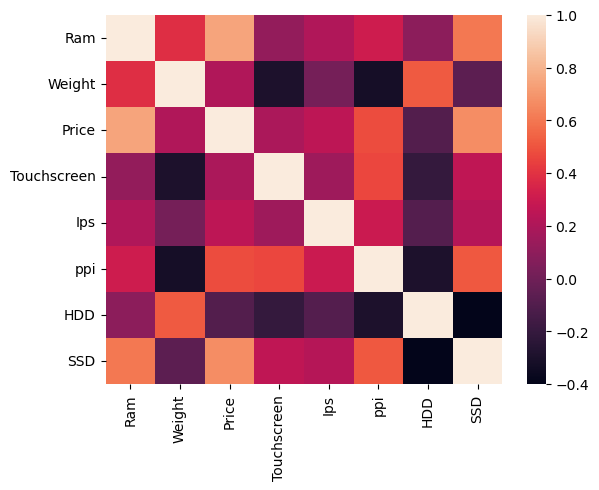

In [130]:
sns.heatmap(df.corr()) #not so strong or very weak correlation between any 2 variables and price --> its okk.

<Axes: xlabel='Price', ylabel='Density'>

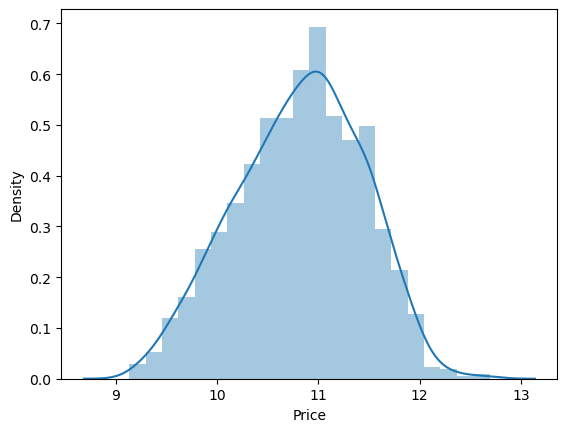

In [131]:
#our target colum was skewed originally but applying log tranformation to it will make it approximately normal distribution
sns.distplot(np.log(df['Price']))

**Price right skewed tha toh usse normal distribution bana denge X and y mai data ko split karte waqt** --> Koi compulsory step nahi h ye! --> sabke saath experiment karna chahie

In [132]:
df.to_csv('laptop_clean_data.csv')

## Data Pre-processing

- X and y mai input and output features ko seperate karte h pehle
- fir Train-test split karenge aur 4 features mai dataset ko break kar lenge --> X_train, X_test, y_train and y_test
- agar column transformer ka use kar rhe h toh categorical features ki encoding, numerical features ki scaling (standardization/normalization) ek saath kar sakte h (**encoding of categorical features can also be done befor X and y split i.e. step 1**)
- Column transformer aur pipeline ka fayda ye h ki hume saare feature k operations + model ki pickle file alag se nahi banane padenge (encoding + scaling + model ki) --> sirf pipeline k raaste saare kaam ho jayenge
- agar hum column transformer aur pipeline use nahi kar rhe h toh hume saare operations ki pickle file alag se banani padegi (encoding, standardization and model ki pickle file) aur deployment k time pe saare operations ki alag se pipeline ya functions alag se banane padenge

### METHOD 1 -  **BINA PIPELINE AUR COLUMN TRANFORMER K KAISE KAAM KARTE H -->**

- Encoding of categorical features can be before or after the X and y break of input and output features.
- Standardization of the numerical features can be done before or after the train-test split but is always advisable to perform it after the train-test split as training set is used for .fit_transform and test set for .transform

**Encoding of Categorical Features**

In [133]:
# Define the categorical columns
categorical_columns = ["Company", "TypeName", "Cpu brand", "Gpu brand", "os"]
numerical_features = ['Ram', 'Weight', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD', 'Price']

In [134]:
from sklearn.preprocessing import OneHotEncoder

## Onehot encoding ka object banayenge pehle
enc = OneHotEncoder(sparse_output=False).fit(df[categorical_columns])

## encoding karke feature ko transform karenge abb
df_encoded = enc.transform(df[categorical_columns])
df_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [135]:
df_encoded.shape

(1302, 36)

In [136]:
categorical_columns

['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']

In [137]:
enc.categories_

[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
        'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
        'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
 array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
        'Workstation'], dtype=object),
 array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
        'Other Intel Processor'], dtype=object),
 array(['AMD', 'Intel', 'Nvidia'], dtype=object),
 array(['Mac', 'Others/No OS/Linux', 'Windows'], dtype=object)]

In [138]:
#categories k naam ko unke encoded column k saath attach karne k liye, feature_category name ko ek list mai create kar rhe h
all_categories = []
for col, x in zip(categorical_columns, enc.categories_):
    for y in x:
        all_categories.append(col + '_' + y)

In [139]:
all_categories

['Company_Acer',
 'Company_Apple',
 'Company_Asus',
 'Company_Chuwi',
 'Company_Dell',
 'Company_Fujitsu',
 'Company_Google',
 'Company_HP',
 'Company_Huawei',
 'Company_LG',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Mediacom',
 'Company_Microsoft',
 'Company_Razer',
 'Company_Samsung',
 'Company_Toshiba',
 'Company_Vero',
 'Company_Xiaomi',
 'TypeName_2 in 1 Convertible',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'Cpu brand_AMD Processor',
 'Cpu brand_Intel Core i3',
 'Cpu brand_Intel Core i5',
 'Cpu brand_Intel Core i7',
 'Cpu brand_Other Intel Processor',
 'Gpu brand_AMD',
 'Gpu brand_Intel',
 'Gpu brand_Nvidia',
 'os_Mac',
 'os_Others/No OS/Linux',
 'os_Windows']

In [140]:
#encoded features (categorical) ko numerical features k saath concatenate karke apna poora data wapis se bana rha h jisme ab koi categorical feature nhi hoga and instead encoded categorical features honge i.e. saare categorical features numerical representation mai encode ho gye honge
df_encoded = pd.concat([
    df[numerical_features].reset_index(drop=True), 
    pd.DataFrame(df_encoded, columns=all_categories).reset_index(drop=True)
], axis=1)

In [141]:
df_encoded #our data is ready to be modelled

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Price,Company_Acer,Company_Apple,...,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,71378.6832,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8,1.34,0,0,127.677940,0,0,47895.5232,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,8,1.86,0,0,141.211998,0,256,30636.0000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,16,1.83,0,1,220.534624,0,512,135195.3360,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,8,1.37,0,1,226.983005,0,256,96095.8080,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,1,1,157.350512,0,128,33992.6400,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1298,16,1.30,1,1,276.053530,0,512,79866.7200,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1299,2,1.50,0,0,111.935204,0,0,12201.1200,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1300,6,2.19,0,0,100.454670,1000,0,40705.9200,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [142]:
df_encoded.isnull().sum() #all is well

Ram                                0
Weight                             0
Touchscreen                        0
Ips                                0
ppi                                0
HDD                                0
SSD                                0
Price                              0
Company_Acer                       0
Company_Apple                      0
Company_Asus                       0
Company_Chuwi                      0
Company_Dell                       0
Company_Fujitsu                    0
Company_Google                     0
Company_HP                         0
Company_Huawei                     0
Company_LG                         0
Company_Lenovo                     0
Company_MSI                        0
Company_Mediacom                   0
Company_Microsoft                  0
Company_Razer                      0
Company_Samsung                    0
Company_Toshiba                    0
Company_Vero                       0
Company_Xiaomi                     0
T

In [143]:
df_model = df_encoded.copy()
df_model

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Price,Company_Acer,Company_Apple,...,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,71378.6832,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8,1.34,0,0,127.677940,0,0,47895.5232,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,8,1.86,0,0,141.211998,0,256,30636.0000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,16,1.83,0,1,220.534624,0,512,135195.3360,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,8,1.37,0,1,226.983005,0,256,96095.8080,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,1,1,157.350512,0,128,33992.6400,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1298,16,1.30,1,1,276.053530,0,512,79866.7200,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1299,2,1.50,0,0,111.935204,0,0,12201.1200,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1300,6,2.19,0,0,100.454670,1000,0,40705.9200,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [144]:
import sklearn
print(sklearn.__version__)

1.4.2


### NECESSARY IMPORTS

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

### X and y break and Train test split

In [146]:
X = df_model.drop(columns=['Price'])
y = df_model['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Data Modelling

### Experiment 1 - Modelling using no changes/transformations on numerical features 

In [147]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [148]:
# Predict on the test set
y_pred = model.predict(X_test)

In [149]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


In [150]:
# Print the results
print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Adjusted R2 Score: {adjusted_r2:.4f}")


Linear Regression Performance:
Mean Squared Error (MSE): 353926098.3367
Root Mean Squared Error (RMSE): 18812.9237
Mean Absolute Error (MAE): 13283.1791
R2 Score: 0.7523
Adjusted R2 Score: 0.7032


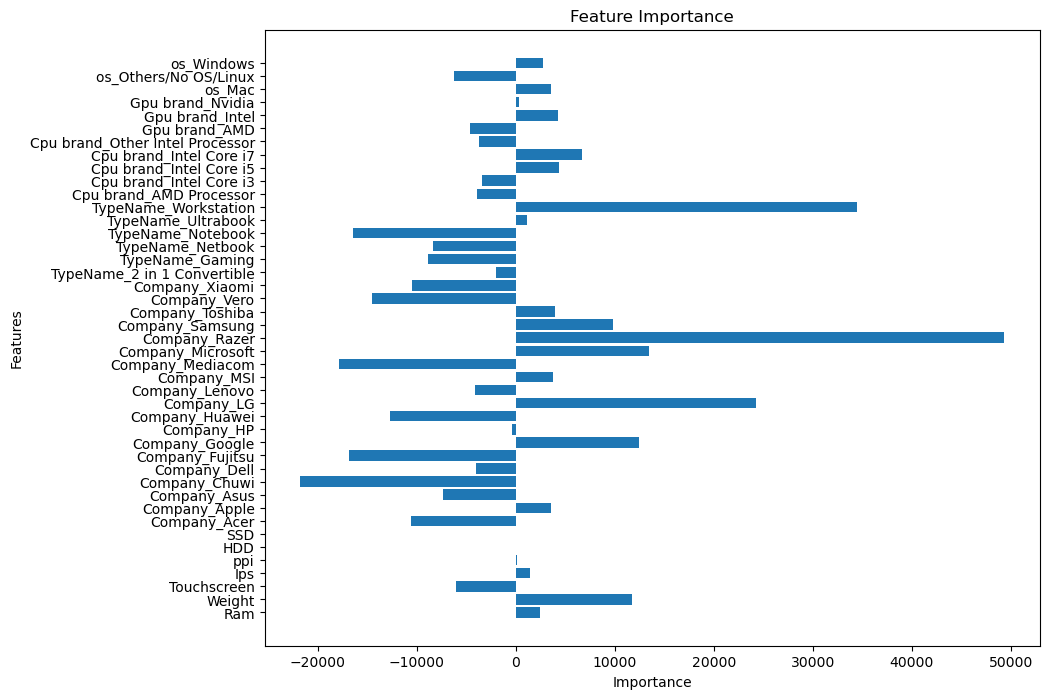

In [151]:
# Plotting feature importance
importance = model.coef_
features = X.columns

plt.figure(figsize=(10, 8))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


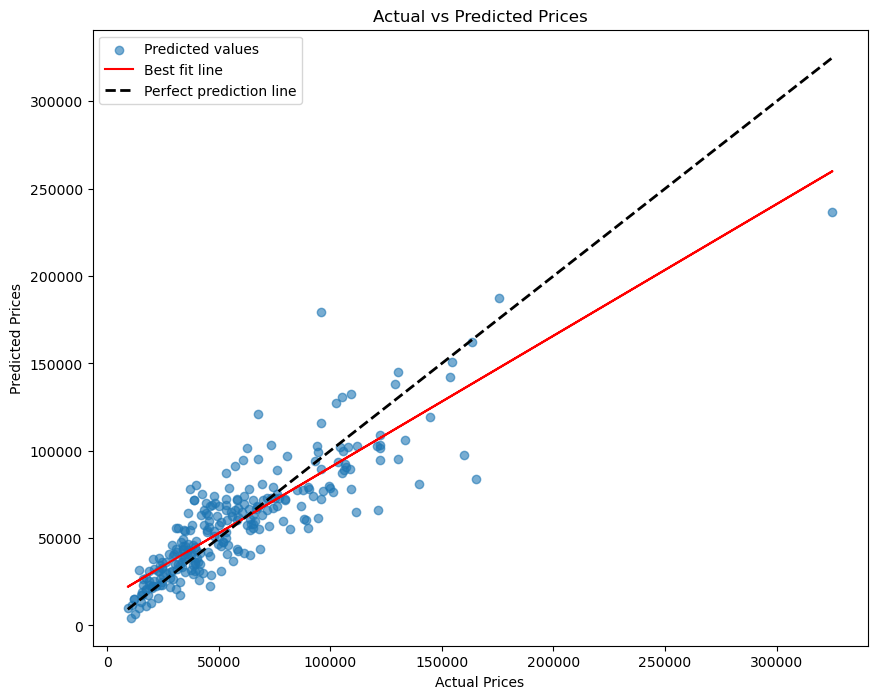

In [152]:
# Plot for ideal perfect fit line and our model's best fit line along with predictions
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted values')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Best fit line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect prediction line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

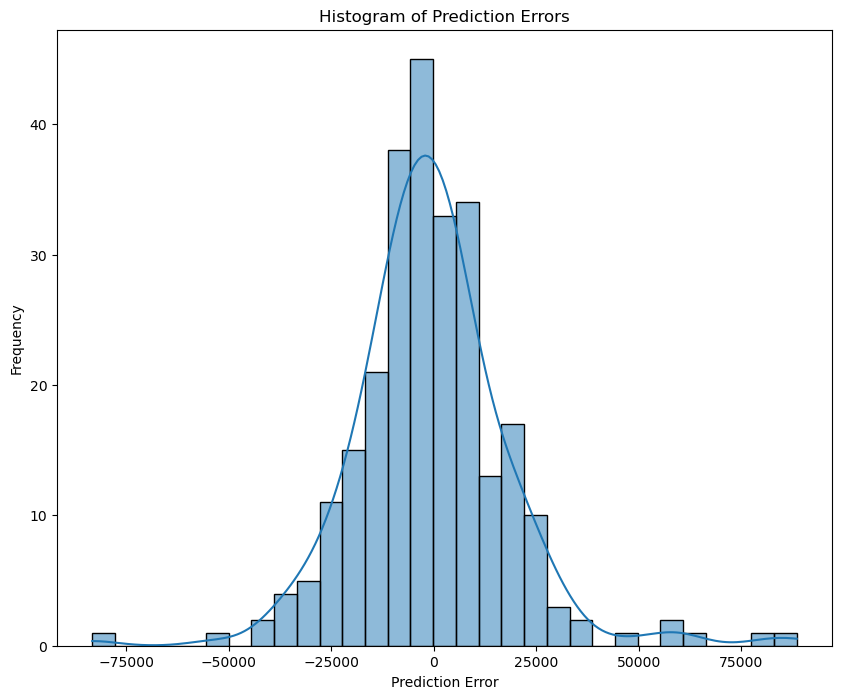

In [153]:
# Histogram of model's error
errors = y_test - y_pred
plt.figure(figsize=(10, 8))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

### Using Lasso Regression

In [154]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 353892199.1497543
RMSE: 18812.02272882303
MAE: 13282.255327532175
R2: 0.7523103213384832
Adjusted R2: 0.7032289564424223


### Using Ridge Regression

In [155]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 352622225.57747054
RMSE: 18778.238085014007
MAE: 13212.135041229134
R2: 0.7531991777382098
Adjusted R2: 0.7042939456771178


### USing ElasticNet Regresstion

In [156]:
from sklearn.linear_model import ElasticNet
# Initialize the Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model on the training data
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 442044748.8465574
RMSE: 21024.86025747989
MAE: 15597.574315038706
R2: 0.690612220165151
Adjusted R2: 0.6293049642531763


### Experiment 2 - changing the scale of the target feature only - 'Price' and bringing it to a lower values scale

- Iss baar encoding of categorical feature  X and y break k baad kar rhe h
- Target feature transformation ('Price' - Numerical feature) ka natural logarithm le rhe h scale down karne k liye

In [157]:
# Separate the features and the target
X = df.drop(columns=['Price'])  # Drop unnecessary columns
y = np.log(df['Price'])  # Take the natural logarithm of the target variable


<Axes: >

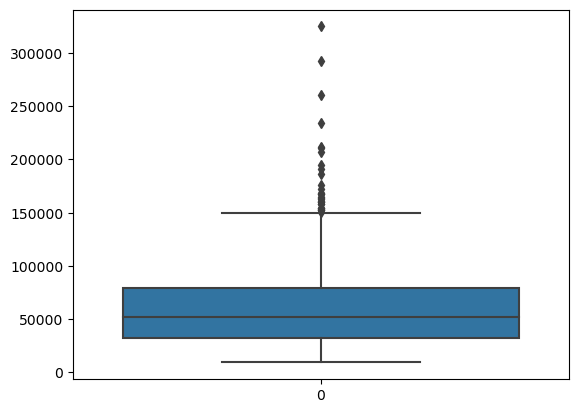

In [158]:
sns.boxplot(df['Price'])

<Axes: >

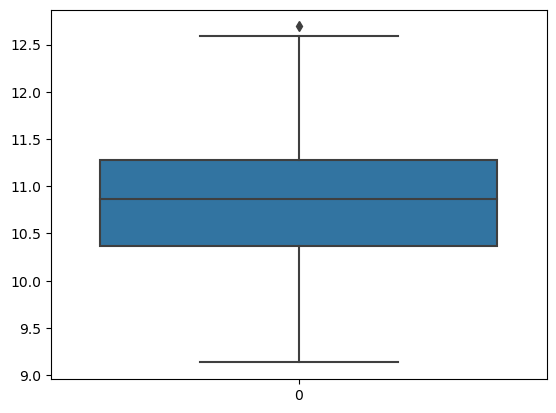

In [159]:
sns.boxplot(np.log(df['Price'])) #outliers bhi log lene se kaafi theek ho gye h

In [160]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [161]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [165]:
# Perform one-hot encoding on categorical features
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
encoder = OneHotEncoder(sparse_output=False, drop='first') #onehot encoding se har feature k first column ko drop kar rha hu
X_encoded = encoder.fit_transform(X[categorical_features])


In [166]:
# Convert the encoded features back to a DataFrame and concatenate with the numerical features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features)) # MEthod 2 for extracting names of the categories
X_numerical = X.drop(columns=categorical_features).reset_index(drop=True)
X_final = pd.concat([X_numerical, X_encoded_df], axis=1)


In [167]:
X_final

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8,1.34,0,0,127.677940,0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8,1.86,0,0,141.211998,0,256,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,16,1.83,0,1,220.534624,0,512,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8,1.37,0,1,226.983005,0,256,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,1,1,157.350512,0,128,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1298,16,1.30,1,1,276.053530,0,512,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1299,2,1.50,0,0,111.935204,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1300,6,2.19,0,0,100.454670,1000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [168]:
X_final.shape #38 features islie aa rhe kyunki humne onehot encoding se har feature k banne wale saare columns se first column ko drop kar diya h (5 categorical features the X mai toh unke liye total banne wale new columns (43 columns) se 5 columns ko hata diya h )

(1302, 38)

In [169]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [170]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [171]:
# Predict on the test set
y_pred = model.predict(X_test)

In [172]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


In [173]:
# Print the results
print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Adjusted R2 Score: {adjusted_r2:.4f}")


Linear Regression Performance:
Mean Squared Error (MSE): 0.0739
Root Mean Squared Error (RMSE): 0.2719
Mean Absolute Error (MAE): 0.2146
R2 Score: 0.8081
Adjusted R2 Score: 0.7753


**Scales of error will also change**

### Ridge Regression

In [174]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 0.07378762135233591
RMSE: 0.2716387699728003
MAE: 0.21474278543125855
R2: 0.808489920100846
Adjusted R2: 0.7757089154334232


**Ridge Regression aur Linear regression ki performance pehle se improve ho gyi h**

**Scales of error will also change**

### Using Lasso regression

In [175]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 0.16313953571942708
RMSE: 0.40390535490313456
MAE: 0.33444370805528373
R2: 0.576583918173027
Adjusted R2: 0.5041072915539957


**Lasso regression ki performance pehle se kaafi gir gyi**

### Using Elasticnet regression

In [176]:
from sklearn.linear_model import ElasticNet
# Initialize the Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model on the training data
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 0.18506225290108763
RMSE: 0.4301886247927618
MAE: 0.34827416789791277
R2: 0.5196851966514466
Adjusted R2: 0.437469149231424


**ElasticNet regression ki performance bhi pehle se kaafi gir gyi**

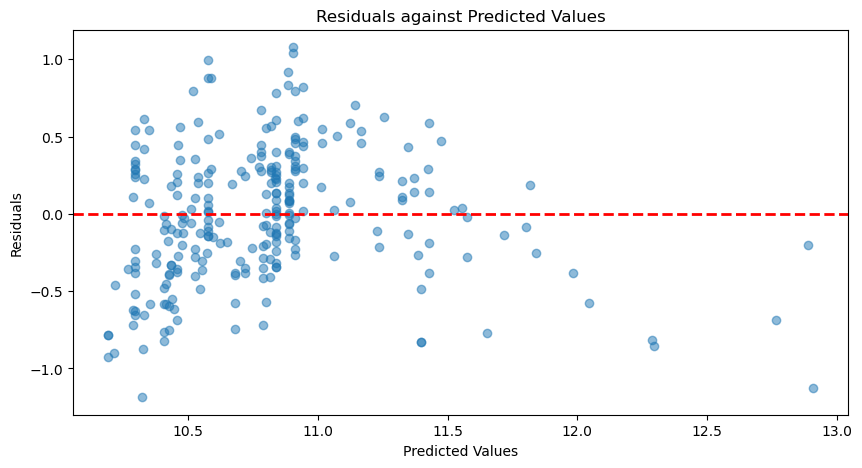

In [177]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals against Predicted Values')
plt.show()

### Experiment 3 
- standardization of all the input numerical features --> standardization ko sirf input features pe hi apply karna chahie varna change of scale in error calculation wali problem aati h

In [178]:
# Separate the features and the target
X = df.drop(columns=['Price'])  # Drop unnecessary columns
y = df['Price']  # Target variable

In [179]:
X,y

(     Company            TypeName  Ram  Weight  Touchscreen  Ips         ppi  \
 0      Apple           Ultrabook    8    1.37            0    1  226.983005   
 1      Apple           Ultrabook    8    1.34            0    0  127.677940   
 2         HP            Notebook    8    1.86            0    0  141.211998   
 3      Apple           Ultrabook   16    1.83            0    1  220.534624   
 4      Apple           Ultrabook    8    1.37            0    1  226.983005   
 ...      ...                 ...  ...     ...          ...  ...         ...   
 1298  Lenovo  2 in 1 Convertible    4    1.80            1    1  157.350512   
 1299  Lenovo  2 in 1 Convertible   16    1.30            1    1  276.053530   
 1300  Lenovo            Notebook    2    1.50            0    0  111.935204   
 1301      HP            Notebook    6    2.19            0    0  100.454670   
 1302    Asus            Notebook    4    2.20            0    0  100.454670   
 
                   Cpu brand   HDD  SS

In [180]:
# Identify categorical and numerical features
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
numerical_features = X.columns.difference(categorical_features)


In [182]:
# Perform one-hot encoding on categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [183]:
# Convert the encoded features back to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_encoded_df

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1300,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [184]:
# Concatenate the encoded and scaled features
X_final = pd.concat([X_numerical, X_encoded_df.reset_index(drop=True)], axis=1)
X_final

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,8,1.34,0,0,127.677940,0,0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,8,1.86,0,0,141.211998,0,256,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,16,1.83,0,1,220.534624,0,512,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8,1.37,0,1,226.983005,0,256,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,1,1,157.350512,0,128,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1298,16,1.30,1,1,276.053530,0,512,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1299,2,1.50,0,0,111.935204,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1300,6,2.19,0,0,100.454670,1000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [185]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [186]:
# Standardize numerical features after the train-test split
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [187]:
X_train

,Ram,Weight,Touchscreen,Ips,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
147,-0.854284,-0.049434,-0.415087,-0.634795,-0.135538,1.157801,-0.995447,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
342,-0.093540,0.098540,-0.415087,1.575311,-0.135538,1.157801,-0.995447,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1003,-0.854284,-0.582143,-0.415087,-0.634795,-0.825104,0.175254,-0.995447,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
814,-0.093540,0.216920,-0.415087,-0.634795,-0.135538,-0.807293,0.380186,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
344,-0.093540,-1.233232,-0.415087,-0.634795,0.439637,-0.807293,0.380186,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.093540,0.542465,-0.415087,-0.634795,-0.135538,1.157801,0.380186,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1130,-0.093540,0.009756,-0.415087,-0.634795,-1.095509,3.122896,-0.995447,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1294,-0.093540,0.394490,-0.415087,-0.634795,-1.095509,1.157801,-0.995447,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
860,-0.093540,0.394490,-0.415087,1.575311,-0.135538,1.157801,-0.995447,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Using Linear Regression

In [188]:
# Initialize the Linear Regression model
model = LinearRegression()

In [189]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [190]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [191]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared


In [192]:
# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 353926098.33668077
RMSE: 18812.923705173547
MAE: 13283.17907401787
R2: 0.7522865952469308
Adjusted R2: 0.7098852016405496


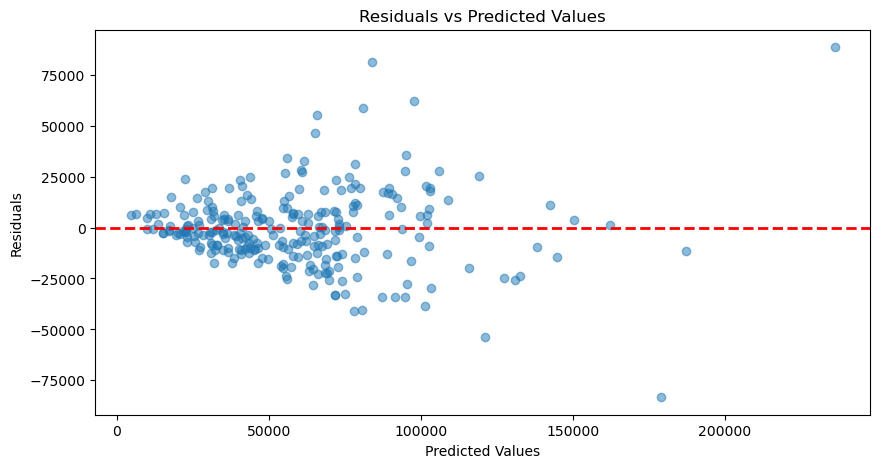

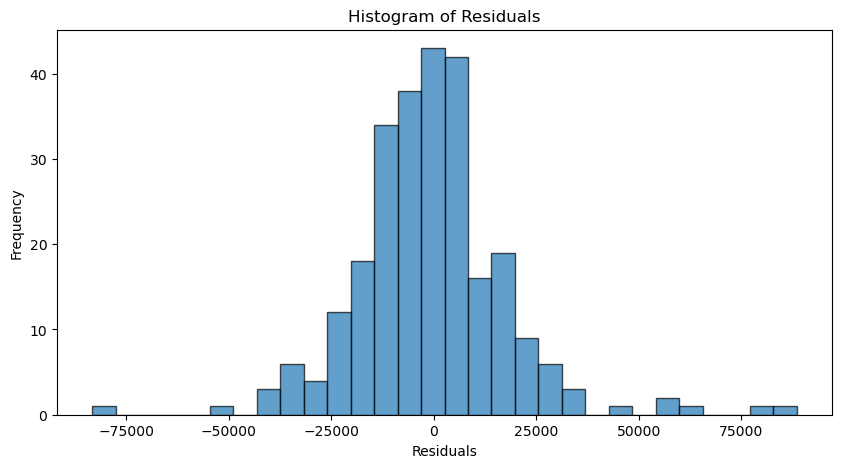

In [193]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### LASSO REGRESSION

In [194]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 353906885.4214853
RMSE: 18812.413067479814
MAE: 13282.206017040433
R2: 0.7523000423949673
Adjusted R2: 0.7099009505526643


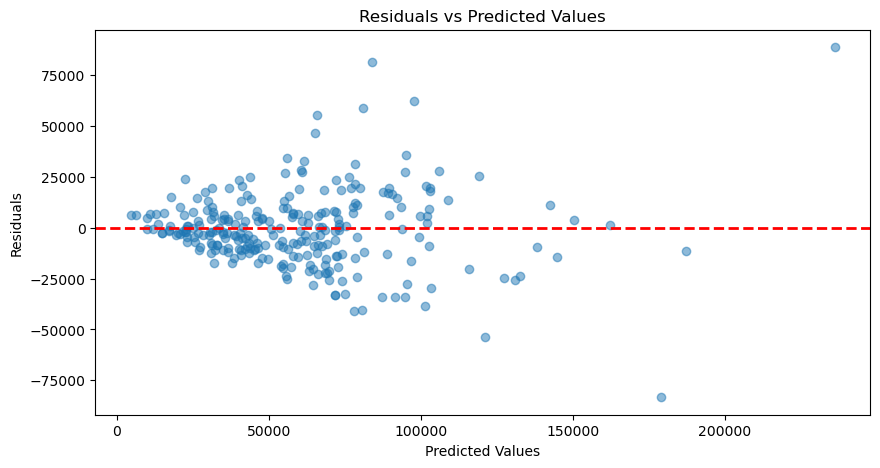

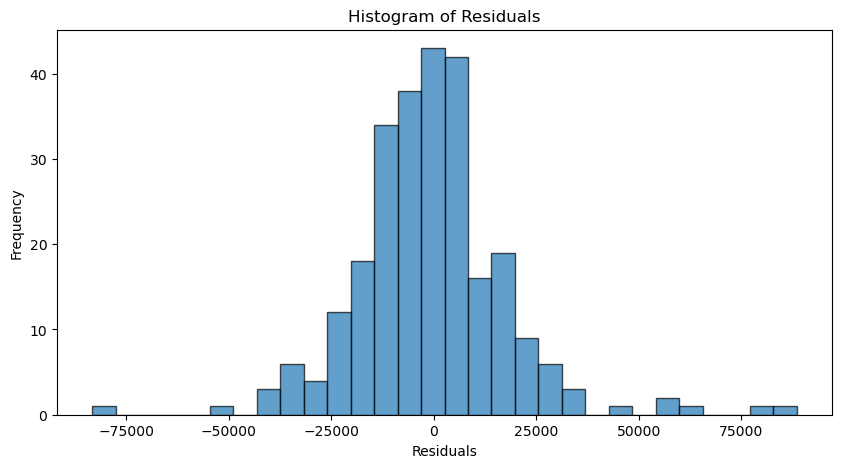

In [195]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### HYPERPARAMETER TUNING FOR LASSO REGRESSION

In [196]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [1000, 5000, 10000],  # Maximum number of iterations
    'tol': [0.0001, 0.001, 0.01]  # Tolerance for optimization
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error') #jis naam se model initialize kiya h wohi pass karna h 
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print(f'Best parameters: {grid_search.best_params_}')

# Train the Lasso model with the best parameters
best_lasso = grid_search.best_estimator_
best_lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

Best parameters: {'alpha': 10, 'max_iter': 1000, 'tol': 0.01}
MSE: 351999339.54636085
RMSE: 18761.64543813684
MAE: 13228.733147964955
R2: 0.7536351366015557
Adjusted R2: 0.7114645743982184


In [197]:
grid_search.best_params_ #best hyperparameter values for lasso regression for this dataset 

{'alpha': 10, 'max_iter': 1000, 'tol': 0.01}

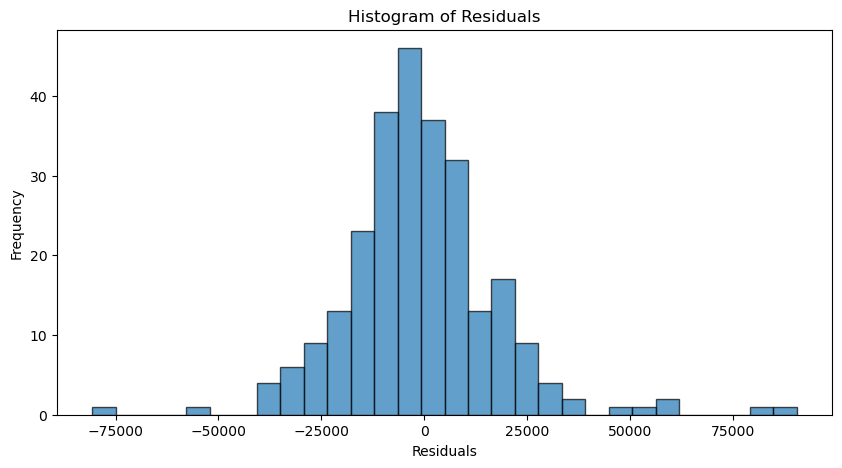

In [198]:
# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### RIDGE REGRESSION

In [199]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 354207816.531324
RMSE: 18820.40957395253
MAE: 13280.086018567155
R2: 0.7520894202618027
Adjusted R2: 0.7096542759822915


### HYPERPARAMETER TUNING FOR RIDGE REGRESSION

In [200]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [1000, 5000, 10000],  # Maximum number of iterations
    'tol': [0.0001, 0.001, 0.01]  # Tolerance for optimization
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print(f'Best parameters: {grid_search.best_params_}')

# Train the Ridge model with the best parameters
best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_ridge.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

Best parameters: {'alpha': 1, 'max_iter': 1000, 'tol': 0.0001}
MSE: 354207816.531324
RMSE: 18820.40957395253
MAE: 13280.086018567155
R2: 0.7520894202618027
Adjusted R2: 0.7096542759822915


In [201]:
grid_search.best_params_ #best hyperparameter values for lasso regression for this dataset 

{'alpha': 1, 'max_iter': 1000, 'tol': 0.0001}

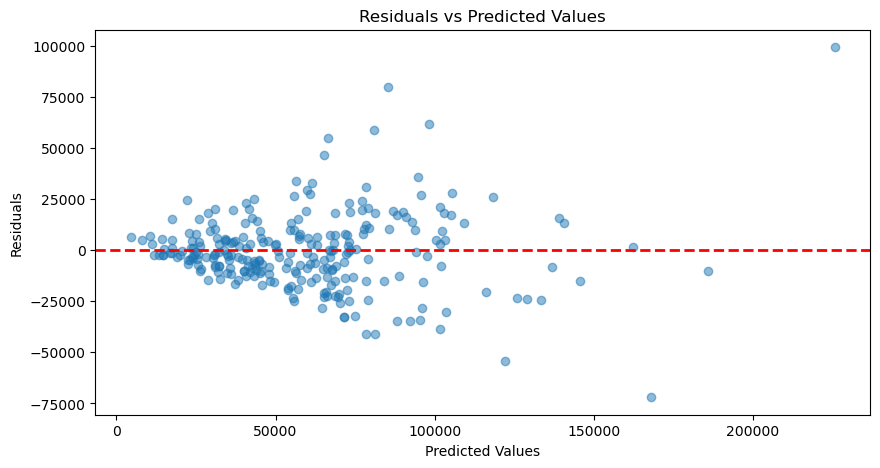

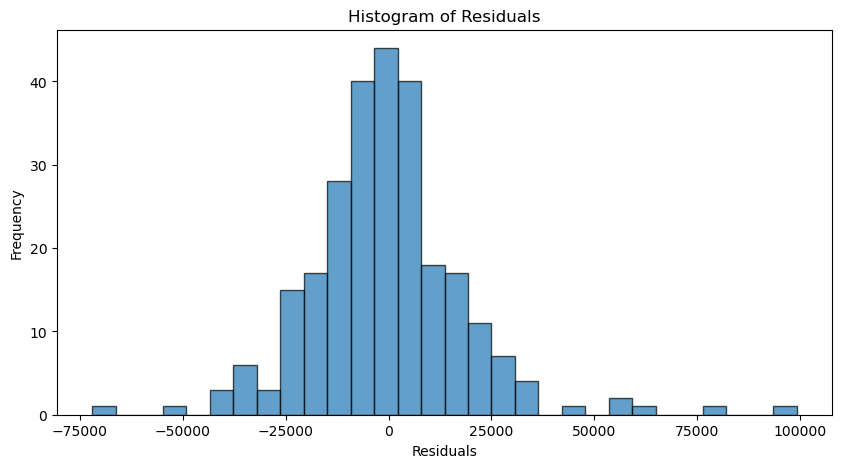

In [202]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### ELASTICNET REGRESSION - without hyperparameter tuning

In [203]:
from sklearn.linear_model import ElasticNet
# Initialize the Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model on the training data
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')

MSE: 494677811.36440474
RMSE: 22241.35363156669
MAE: 16354.06995146976
R2: 0.6537742611105619
Adjusted R2: 0.5945103958952527


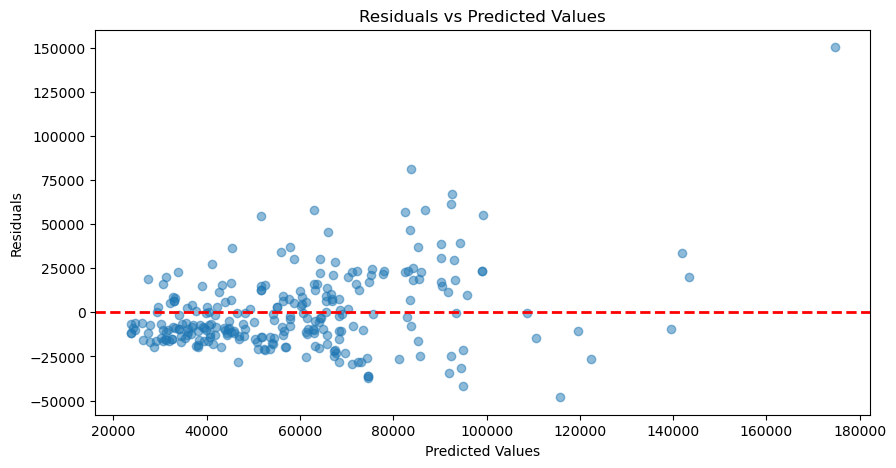

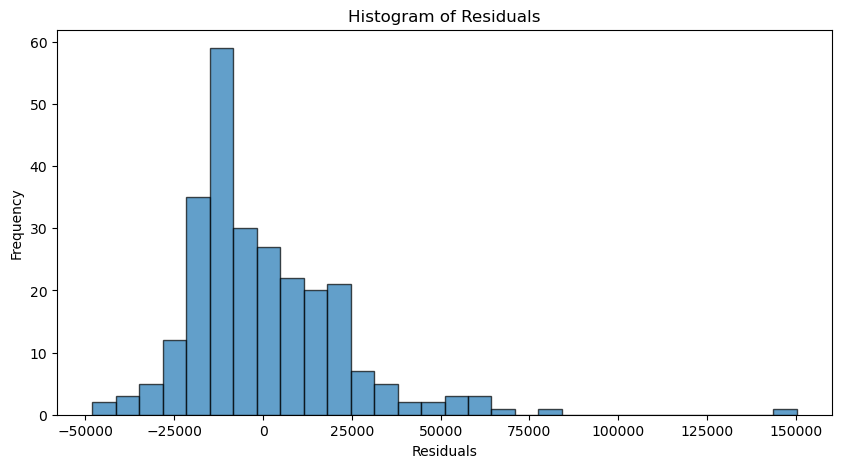

In [204]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Hyperparameter Tuning for ELASTICNET REGRESSION

In [205]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1],  # Mix of L1 and L2 regularization
    'max_iter': [1000, 5000, 10000],  # Maximum number of iterations
    'tol': [0.0001, 0.001, 0.01]  # Tolerance for optimization
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print(f'Best parameters: {grid_search.best_params_}')

# Train the Elastic Net model with the best parameters
best_elastic_net = grid_search.best_estimator_
best_elastic_net.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared
n = len(y_test)  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)  # Adjusted R-squared

# Print the evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')


Best parameters: {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000, 'tol': 0.0001}
MSE: 354286286.55429405
RMSE: 18822.49416401275
MAE: 13280.088014955682
R2: 0.7520344989755446
Adjusted R2: 0.7095899537551423


**performance of elasticnet regression regreesion significantly improved by hyperparameter tuning**

In [206]:
grid_search.best_params_ #best hyperparameter values for elasticnet regression for this dataset

{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000, 'tol': 0.0001}

### USING ALL REGRESSION MODELS

### Experiment - Standardization of all numerical features 

 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:04<00:02,  1.55it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 1041, number of used features: 30
[LightGBM] [Info] Start training from score 60219.339601


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:09<00:00,  1.54it/s]


                   Train Mean Squared Error  Train Root Mean Squared Error  \
Linear Regression             299142203.444                      17295.728   
Ridge                         300091770.605                      17323.157   
Lasso                         299147500.070                      17295.881   
Random Forest                  46955441.895                       6852.404   
AdaBoost                      512218295.596                      22632.240   
GradientBoosting              146931381.880                      12121.526   
SVR                           314841140.331                      17743.763   
KNeighbors                    224992949.431                      14999.765   
Decision Tree                   8865734.487                       2977.538   
CatBoost                       58279521.722                       7634.103   
XGBoost                        20641409.607                       4543.282   
LightGBM                      121843603.339                     

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 23.01it/s]


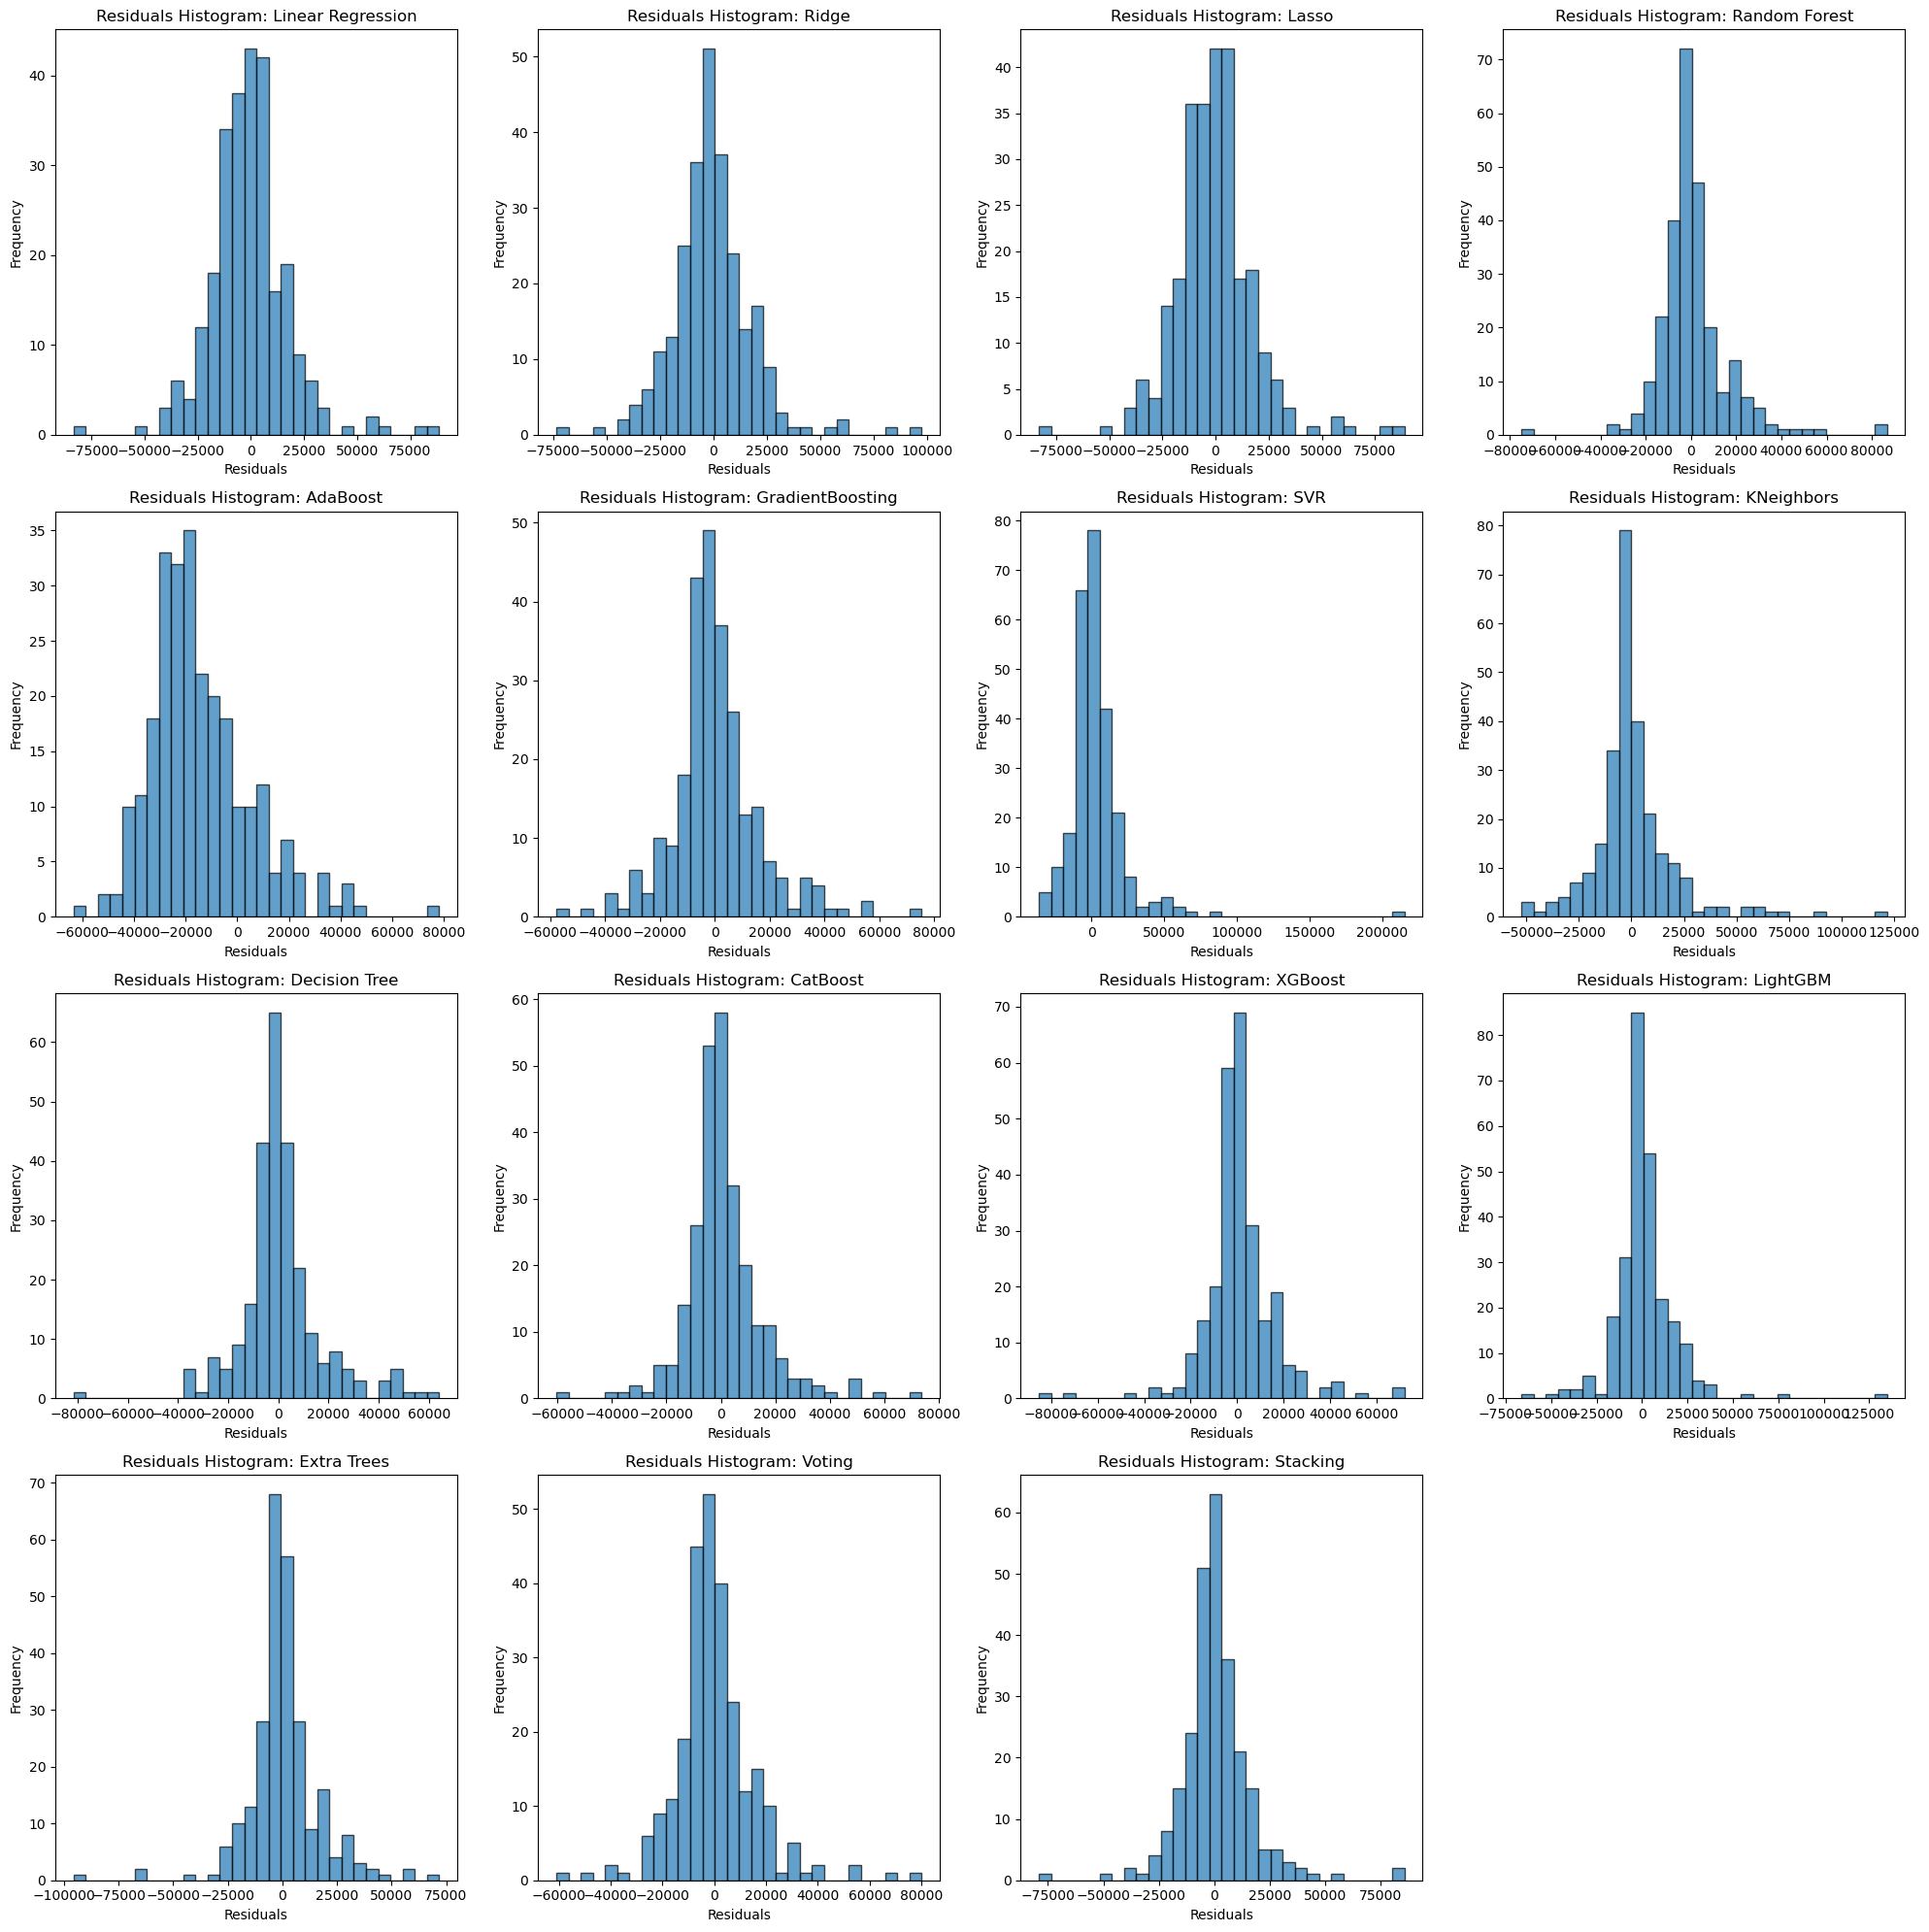

In [207]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# X and y split (X = input features and y = target feature)
X = df.drop(columns=['Price'])
y = df['Price']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop=None)
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical features
X_final = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Standardize numerical features after the train-test split
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(kernel='rbf',C=10000,epsilon=0.1),
    'KNeighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': XGBRegressor(eval_metric='rmse'),
    'LightGBM': LGBMRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Voting': VotingRegressor(estimators=[
        ('lr', LinearRegression()),  # ye combinations change kiye jaa sakte h aur inhe change karke aur new models k combination mai run kiya ja sakta h
        ('rf', RandomForestRegressor()), 
        ('gbr', GradientBoostingRegressor())
    ]),
    'Stacking': StackingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),# ye combinations change kiye jaa sakte h aur inhe change karke aur new models k combination mai run kiya ja sakta h
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
    ])
}

# Train and evaluate models
results = {}

for i, (name, model) in enumerate(tqdm(models.items()), 1):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    testing_time = time.time() - start_time
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    results[name] = {
        'Train Mean Squared Error': mse_train,
        'Train Root Mean Squared Error': rmse_train,
        'Train Mean Absolute Error': mae_train,
        'Train R2 Score': r2_train,
        'Test Mean Squared Error': mse_test,
        'Test Root Mean Squared Error': rmse_test,
        'Test Mean Absolute Error': mae_test,
        'Test R2 Score': r2_test,
        'Training Time (s)': training_time,
        'Testing Time (s)': testing_time
    }

# Display results with exact values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results_df = pd.DataFrame(results).T
print(results_df)

# Plot histogram of residuals for each model
plt.figure(figsize=(20, 20))

for i, (name, model) in enumerate(tqdm(models.items()), 1):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.subplot(4, 4, i)
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram: {name}')

plt.tight_layout()
plt.show()


In [208]:
results_df

,Train Mean Squared Error,Train Root Mean Squared Error,Train Mean Absolute Error,Train R2 Score,Test Mean Squared Error,Test Root Mean Squared Error,Test Mean Absolute Error,Test R2 Score,Training Time (s),Testing Time (s)
Linear Regression,299142203.444,17295.728,12185.548,0.783,353926098.337,18812.924,13283.179,0.752,0.003,0.003
Ridge,300091770.605,17323.157,12237.373,0.782,352777563.790,18782.374,13214.470,0.753,0.000,0.000
Lasso,299147500.070,17295.881,12185.913,0.783,353596302.444,18804.157,13273.744,0.753,0.049,0.000
Random Forest,46955441.895,6852.404,4132.595,0.966,245362707.163,15664.058,9955.298,0.828,0.424,0.032
AdaBoost,512218295.596,22632.240,19854.182,0.628,591383688.014,24318.382,20926.974,0.586,0.113,0.018
GradientBoosting,146931381.880,12121.526,8673.916,0.893,259331535.040,16103.774,11121.383,0.818,0.146,0.016
SVR,314841140.331,17743.763,9681.749,0.771,458580705.765,21414.498,11973.884,0.679,0.075,0.141
KNeighbors,224992949.431,14999.765,9559.120,0.836,383877850.997,19592.801,12211.885,0.731,0.012,0.309
Decision Tree,8865734.487,2977.538,765.557,0.994,269408691.155,16413.674,10618.916,0.811,0.018,0.001
CatBoost,58279521.722,7634.103,5415.794,0.958,209608051.775,14477.847,9543.306,0.853,1.344,0.003


### Hyperparameter tuning for each model - Running this will take hours (be prepared)

**You can increase or decrease the number of hyperparameters too (use shift+tab for each model to know about it)**

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# X and y split (X = input features and y = target feature)
X = df.drop(columns=['Price'])
y = df['Price']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, drop=None)
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical features
X_final = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Standardize numerical features after the train-test split
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize models and hyperparameters
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0, 50.0, 100.0]}),
    'Lasso': (Lasso(), {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20]}),
    'AdaBoost': (AdaBoostRegressor(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}),
    'GradientBoosting': (GradientBoostingRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}),
    'SVR': (SVR(), {'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2], 'kernel': ['linear', 'rbf']}),
    'KNeighbors': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [10, 20, 30], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4]}),
    'CatBoost': (CatBoostRegressor(verbose=0), {'iterations': [100, 200], 'depth': [4, 6], 'learning_rate': [0.01, 0.1]}),
    'XGBoost': (XGBRegressor(eval_metric='rmse'), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}),
    'LightGBM': (LGBMRegressor(), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'num_leaves': [31, 62]}),
    'Extra Trees': (ExtraTreesRegressor(), {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20]}),
    'Voting': (VotingRegressor(estimators=[
        ('lr', LinearRegression()), 
        ('rf', RandomForestRegressor()), 
        ('gbr', GradientBoostingRegressor())
    ]), {'weights': [[1, 1, 1], [1, 2, 1], [2, 1, 1]]}),
    'Stacking': (StackingRegressor(estimators=[
        ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)),
        ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
        ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
    ]), {})
}

# Train and evaluate models with hyperparameter tuning and cross-validation
results = {}

for name, (model, params) in tqdm(models.items()):
    start_time = time.time()
    if params:
        model = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    testing_time = time.time() - start_time
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    if hasattr(model, 'best_params_'):
        best_params = model.best_params_
    else:
        best_params = 'N/A'
    
    results[name] = {
        'Best Params': best_params,
        'Train Mean Squared Error': mse_train,
        'Train Root Mean Squared Error': rmse_train,
        'Train Mean Absolute Error': mae_train,
        'Train R2 Score': r2_train,
        'Test Mean Squared Error': mse_test,
        'Test Root Mean Squared Error': rmse_test,
        'Test Mean Absolute Error': mae_test,
        'Test R2 Score': r2_test,
        'Training Time (s)': training_time,
        'Testing Time (s)': testing_time
    }

# Display results with exact values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
results_df = pd.DataFrame(results).T
print(results_df)

# Plot histogram of residuals for each model
plt.figure(figsize=(20, 20))

for i, (name, (model, _)) in enumerate(tqdm(models.items()), 1):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.subplot(4, 4, i)
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram: {name}')

plt.tight_layout()
plt.show()


### Hyperparameter Tuning for all models - if above code fails use this (will take hours to run)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from tqdm import tqdm

# X and y split (X = input features and y = target feature)
X = df_model.drop(columns=['Price'])
y = df_model['Price']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical features
X_final = pd.concat([X[numerical_features].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Standardize numerical features after the train-test split
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Define hyperparameter grids for each model
param_grids = {
    'Linear Regression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky']},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0], 'max_iter': [1000, 5000, 10000]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    'GradientBoosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 5, 7]},
    'SVR': {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'CatBoost': {'iterations': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 0.3], 'depth': [3, 6, 10]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.3], 'num_leaves': [31, 62, 127]}
}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),
    'XGBoost': XGBRegressor(eval_metric='rmse'),
    'LightGBM': LGBMRegressor()
}

# Train and evaluate models with hyperparameter tuning
results = {}
plt.figure(figsize=(20, 20))

for i, (name, model) in enumerate(tqdm(models.items()), 1):
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae,
        'R2 Score': r2
    }
    
    # Plotting
    plt.subplot(4, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted values')
    m, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, m * y_test + b, color='red', label='Best fit line')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect prediction line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(name)
    plt.legend()

plt.tight_layout()
plt.show()

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot histogram of residuals for each model
plt.figure(figsize=(20, 20))

for i, (name, model) in enumerate(tqdm(models.items()), 1):
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.subplot(4, 3, i)
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram: {name}')

plt.tight_layout()
plt.show()


### 3rd way of doing hyperparameter tuning - if above 2 fails, use this (will take hours to run)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from tqdm import tqdm

# Assuming df_model is your dataframe
X = df_model.drop(columns=['Price'])
y = df_model['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their parameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0], 'solver': ['auto', 'svd', 'cholesky']}),
    'Lasso': (Lasso(), {'alpha': [0.1, 1.0, 10.0], 'selection': ['cyclic', 'random']}),
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'AdaBoost': (AdaBoostRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'loss': ['linear', 'square', 'exponential']
    }),
    'GradientBoosting': (GradientBoostingRegressor(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }),
    'SVR': (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }),
    'KNeighbors': (KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    'DecisionTree': (DecisionTreeRegressor(), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'CatBoost': (CatBoostRegressor(verbose=0), {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'depth': [4, 6, 8]
    }),
    'XGBoost': (XGBRegressor(eval_metric='rmse'), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7]
    }),
    'LightGBM': (LGBMRegressor(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.3],
        'num_leaves': [31, 63, 127]
    })
}

results = {}

plt.figure(figsize=(20, 20))

for i, (name, (model, params)) in enumerate(tqdm(models.items()), 1):
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae,
        'R2 Score': r2,
        'Best Parameters': grid_search.best_params_
    }
    
    # Plotting
    plt.subplot(4, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted values')
    m, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, m * y_test + b, color='red', label='Best fit line')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect prediction line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(name)
    plt.legend()

plt.tight_layout()
plt.show()

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

### Using Column Transformer and Pipeline

In [209]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [210]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

**Using onehot encoding and standardization of numerical features both - model = Linear Regression**

In [211]:
# Identify numerical and categorical features by their indices
categorical_features = [0, 1, 7, 10, 11]
numerical_features = list(set(range(X.shape[1])) - set(categorical_features))

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.7177391542518529
MAE: 12535.796980383302
MSE: 302534229.3650815
RMSE: 17393.511128150105


**Using only onehot encoding of Categorical features and no operation on numerical features--> model = Linear Regression**

In [212]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough') #step1 = applying onehotencoding on columns 0,1,7,10,11

step2 = LinearRegression() # step1 = applying linear regression

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7177391542518821
MAE 12535.796980381887


### Saare models ko column transformer aur pipeline ko use karke kaise banaye

### Experiment - price feature is scaled down using log(price) {experiment 2 only} and no other operation on input numerical features + onehot encoding of categorical features

### Linear regression

<Axes: xlabel='Price', ylabel='Density'>

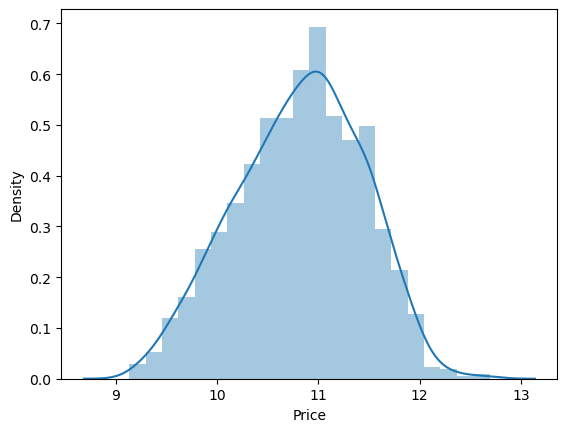

In [213]:
sns.distplot(np.log(df['Price']))

**X and y break of input and output features**

In [214]:
X = df.drop(columns=['Price'])
y = np.log(df['Price']) #natural logarithm of the price

**Train test split with test size = 15% and train size = 85%**

In [215]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

### Necessary Imports

In [217]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

**Validating only on test set (generally done)**

In [219]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough') #step1 = applying onehotencoding on columns 0,1,7,10,11

step2 = LinearRegression() # step1 = applying linear regression

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277450155156
MAE 0.21017827953019008


**Scale of error changes - Already discussed previously**
- **R2 score is okk**

**Validating on both train and test set**

In [220]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.833974957570625
Training Adjusted R² score: 0.8321521757690216
Training MAE: 0.19854244057479886
******************************
Test R² score: 0.8073277450155156
Test Adjusted R² score: 0.7946934987870249
Test MAE: 0.21017827953019008


**Train and Test R2 and Adjusted R2 scores are close**

### Ridge Regression

**Validating only on test set (generally done)**

In [222]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331033739459
MAE 0.20926802210371429


**performing better than Linear Regression**

- R2 score improved 

**Validating on Train and Test Data**

In [223]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.8243914257416736
Training Adjusted R² score: 0.8224634267562208
Training MAE: 0.2045078717049606
******************************
Test R² score: 0.8127331033739459
Test Adjusted R² score: 0.8004533068738768
Test MAE: 0.20926802210371429


**Works well**

### Lasso Regression

**Validating on test set only (generally done)**

In [224]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853947620581
MAE 0.21114361575113466


**Validating on training and test set both**

In [226]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.825097756020432
Training Adjusted R² score: 0.8231775118047369
Training MAE: 0.2048416532280453
******************************
Test R² score: 0.8071853947620581
Test Adjusted R² score: 0.7945418140907177
Test MAE: 0.21114361575113466


**Works well**

### KNN

**Validating on only test set (generally done)**

In [227]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8026697223850707
MAE 0.19295147960972717


**Comparing the training and testing performances**

In [228]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.9002980866966219
Training Adjusted R² score: 0.8992034636777376
Training MAE: 0.14214608318741057
******************************
Test R² score: 0.8026697223850707
Test Adjusted R² score: 0.7897300320496655
Test MAE: 0.19295147960972717


**clear cut case of overfitting --> difference between training and testing scores is huge**
- **one of the possible solution is hyperparameter tuning (not a sure solution)**

### Decision Tree

**validating on the test set only (generally done)**

In [229]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8500815739541043
MAE 0.17740962215105616


**validating on the training and testing sets both -> Comparing the training and testing performances**

In [230]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.9156717113482636
Training Adjusted R² score: 0.9147458746933498
Training MAE: 0.13245585717524302
******************************
Test R² score: 0.8384849039235234
Test Adjusted R² score: 0.8278937500824429
Test MAE: 0.182695966368387


- **clear cut case of overfitting --> Difference between training and testing score is huge**
- **Decision trees in general have the tendency to overfit the data**
- **one of the possible solution is hyperparameter tuning**

### SVM

**validating on the test set only (generally done)**

In [231]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083168388464498
MAE 0.20239400567845295


**validating on the training and testing sets both -> Comparing the training and testing performances**

In [232]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.8705812978346599
Training Adjusted R² score: 0.8691604154687091
Training MAE: 0.17138680803378112
******************************
Test R² score: 0.8083168388464498
Test Adjusted R² score: 0.7957474512298235
Test MAE: 0.20239400567845295


- **Overfit model**
- **one of the possible solution is hyperparameter tuning**

### Random Forest

**validating on the test set only (generally done)**

In [233]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


**validating on the training and testing sets both -> Comparing the training and testing performances**

In [254]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.9522213146831027
Training Adjusted R² score: 0.9516967545515357
Training MAE: 0.10415082459764818
******************************
Test R² score: 0.8873402378382488
Test Adjusted R² score: 0.8799527124505929
Test MAE: 0.15860130110457718


**Some overfitting is still there**
- **Possible solution - Hyperparameter tuning (not guaranteed)**

### ExtraTrees

**validating on the test set only (generally done)**

In [236]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8850720167552375
MAE 0.16154538000217084


**validating on the training and testing sets both -> Comparing the training and testing performances**

In [237]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.9474567068384847
Training Adjusted R² score: 0.9468798362822741
Training MAE: 0.10767196168154618
******************************
Test R² score: 0.8850720167552375
Test Adjusted R² score: 0.8775357555588597
Test MAE: 0.16154538000217084


**Overfit model but slightly less than the previous ones**

### AdaBoost

**validating on the test set only (generally done)**

In [238]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7892087231700338
MAE 0.2322960202740164


**validating on the training and testing sets both -> Comparing the training and testing performances**

In [240]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.8044131951313549
Training Adjusted R² score: 0.8022658560111136
Training MAE: 0.22618396808857866
******************************
Test R² score: 0.7894706915312454
Test Adjusted R² score: 0.7756654909759172
Test MAE: 0.23663229931936544


**Model is stable but performance is not good (scores)**

### Gradient Boosting

**validating on the test set only (generally done)**

In [241]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8827563927312483
MAE 0.1593657161617677


**validating on the training and testing sets both -> Comparing the training and testing performances**

In [242]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.9575447657623692
Training Adjusted R² score: 0.9570786515712882
Training MAE: 0.09924466342161485
******************************
Test R² score: 0.8835762049750622
Test Adjusted R² score: 0.8759418577603122
Test MAE: 0.1589841170718641


**Overfit model. comparable overfitting like the previous models**

### Voting Regressor

**validating on the test set only (generally done)**

In [243]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8907396045896987
MAE 0.15808790821392368


**validating on the training and testing sets both -> Comparing the training and testing performances**

In [244]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.9451792409781911
Training Adjusted R² score: 0.9445773662222334
Training MAE: 0.1135893513021422
******************************
Test R² score: 0.8907950349222433
Test Adjusted R² score: 0.8836340536056692
Test MAE: 0.15812878107447448


**Still a overfit model but with lowest level of overfitting**

### Stacking

In [245]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=150,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8815346916803335
MAE 0.16652352863635878


**Validating on traing and testing set**

In [246]:
# Define the ColumnTransformer and Pipeline
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=150,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Calculate R² score and MAE on the training data
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R² score and MAE on the test data
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate the adjusted R² score
n_train = X_train.shape[0]
p_train = X_train.shape[1]
adjusted_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

n_test = X_test.shape[0]
p_test = X_test.shape[1]
adjusted_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

# Print the results
print('Training R² score:', r2_train)
print('Training Adjusted R² score:', adjusted_r2_train)
print('Training MAE:', mae_train)
print("*"*30)
print('Test R² score:', r2_test)
print('Test Adjusted R² score:', adjusted_r2_test)
print('Test MAE:', mae_test)

Training R² score: 0.927776475436178
Training Adjusted R² score: 0.9269835364656694
Training MAE: 0.13278817334683737
******************************
Test R² score: 0.8805957820754349
Test Adjusted R² score: 0.8727659972934962
Test MAE: 0.16802614930736648


- **Stacking is also an overfit model but better than the previous ones**
- **Also, MAE is also less (difference in MAE's)**

### Exporting the Model

### I am exporting the last run model- Stacking model and our clean dataframe

In [255]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [248]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.370,71378.683,0,1,226.983,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.340,47895.523,0,0,127.678,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.860,30636.000,0,0,141.212,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.830,135195.336,0,1,220.535,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.370,96095.808,0,1,226.983,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.800,33992.640,1,1,157.351,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.300,79866.720,1,1,276.054,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.500,12201.120,0,0,111.935,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.190,40705.920,0,0,100.455,Intel Core i7,1000,0,AMD,Windows


In [250]:
import xgboost
print(xgboost.__version__)

1.7.1


In [251]:
import pandas
print(pandas.__version__)

1.4.3


In [252]:
import sklearn
print(sklearn.__version__)

1.4.2


In [253]:
import numpy
print(numpy.__version__)

1.26.4
